# **Regression lineaire sur les top sons de Spotify dans 73 pays**
# *Michy Elouan & Denoel Niels*

**lien de la base étudiée** : https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated/data

# **1 - INTRODUCTION**

**Contexte** : Ce projet porte sur l'analyse d'une base de données contenant des informations détaillées sur les musiques disponibles sur Spotify. Chaque morceau est décrit par des variables telles que la durée, le genre, l'année de sortie, le tempo, ainsi que diverses caractéristiques acoustiques. L'objectif est d'explorer les relations entre ces variables afin de mieux comprendre leurs interactions et leur influence sur certains aspects de l'expérience musicale sur la plateforme.

**Problématique** : Quels sont les liens entre la popularité des musiques et les différentes caractéristiques des morceaux disponibles sur Spotify, telles que la durée, le genre, l'année de sortie, le tempo et d'autres attributs acoustiques ?

**Enjeux** : Analyser la popularité d'une chanson, une mesure abstraite et subjective influencée par les goûts individuels, en fonction de ses attributs musicaux. La popularité, en tant qu'évaluation relative et non physique, se distingue des autres variables comme la durée, le tempo ou le genre, qui sont des caractéristiques objectives et mesurables.

# **2 - EXPLORATION DES DONNEES**

## 2.1 - Visualisation & Informations des données brutes

In [5]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, boxcox, kstest, jarque_bera
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow, linear_reset, het_white

In [6]:
# Importation des données du fichier et lecture du affichage
Base = pd.read_csv("universal_top_spotify_songs.csv")

Observons les données brutes en commençant par les **dimensions** et les **premières lignes** de notre dataset

In [8]:
Base.head()
N, P = Base.shape
print("Notre base de données comporte : \nn =", N, "observations\np =", P, "variables")

print("Visualisation")
Base.head()

Notre base de données comporte : 
n = 1695944 observations
p = 25 variables
Visualisation


,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,0,NaN,2025-02-08,99,False,...,6,-7.777,0,0.0304,0.3080,0.0000,0.1220,0.535,157.969,3
1,5ZLUm9eab8y3tqQ1OhQSHI,Abracadabra,Lady Gaga,2,3,48,NaN,2025-02-08,84,False,...,10,-3.487,0,0.0624,0.0121,0.0000,0.2220,0.633,126.004,4
2,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",3,1,0,NaN,2025-02-08,91,False,...,0,-4.477,0,0.2600,0.0283,0.0000,0.3550,0.939,149.027,4
3,3sK8wGT43QFpWrvNQsrQya,DtMF,Bad Bunny,4,-2,-2,NaN,2025-02-08,98,True,...,7,-27.405,0,0.0717,0.1770,0.2180,0.0807,0.032,136.020,4
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,-2,3,NaN,2025-02-08,96,False,...,2,-10.171,1,0.0358,0.2000,0.0608,0.1170,0.438,104.978,4


## 2.2 -  Informations sur les variables 

On veut maintenant s'intéresser à la nature de nos variables.

In [10]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695944 entries, 0 to 1695943
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   spotify_id          object 
 1   name                object 
 2   artists             object 
 3   daily_rank          int64  
 4   daily_movement      int64  
 5   weekly_movement     int64  
 6   country             object 
 7   snapshot_date       object 
 8   popularity          int64  
 9   is_explicit         bool   
 10  duration_ms         int64  
 11  album_name          object 
 12  album_release_date  object 
 13  danceability        float64
 14  energy              float64
 15  key                 int64  
 16  loudness            float64
 17  mode                int64  
 18  speechiness         float64
 19  acousticness        float64
 20  instrumentalness    float64
 21  liveness            float64
 22  valence             float64
 23  tempo               float64
 24  time_signature      int6

# Les variables représentent les données suivantes:

- **spotify_id** : identifiant unique du son spotify  (_qualitatif_)  
- **name** : le titre de la musique (_qualitatif_)
- **artists** : nom de ou des artistes associé à la musique (_qualitatif_)
- **daily_rank** : classement journalier du son sur les top 50 (**discrète**) (_quantitatif_)
- **daily_movement** : Évolution du classement par rapport à la veille (**discrète**) (_quantitatif_)
- **weekly_movement** : Évolution du classement par rapport à la semaine précédente (**discrète**) (_quantitatif_)
- **country** : Le code ISO du pays de la liste de lecture du Top 50. Si Null, la liste de lecture est « Global Top 50 » (_qualitatif_)
- **snapshot_date** : Date à laquelle les données ont été collectées à partir de l'API Spotify (_qualitatif_)
- **popularity** : mesure de la popularité actuelle de la chanson sur Spotify (**discrète**) (_quantitatif_)
- **is_explicit** : Indique s'il y a des des musiques contennant des paroles explicite (_qualitatif_)
- **duration_ms** : La durée de la musique en micro seconde (**discrète**) (_quantitatif_)
- **album_name** : Titre de l'album contenant la musique (_qualitatif_)
- **album_release_date** : Date à laquelle l'album du son est sorti (_qualitatif_)
- **danceability** : le degré d'adéquation d'un morceau à la danse sur la base d'une combinaison d'éléments musicaux (**continue**) (_quantitatif_)
- **energy** : mesure de l'intensité et niveaux d'activité de la musique (**continue**) (_quantitatif_)
- **key** : La tonalité de la chanson (**discrète**) (_quantitatif_)
- **loudness** : L'intensité sonore globale de la chanson en décibels (**continue**) (_quantitatif_)
- **mode** : Indique si la chanson est dans une tonalité majeure ou mineure (**discrète**) (_quantitatif_)
- **speechiness** : Mesure la probabilité d'une chanson à contenir des paroles (**continue**) (_quantitatif_)
- **acoustiness** : Mesure de la qualité acoustique de la chanson (**continue**) (_quantitatif_)
- **instrumentalness** : Mesure de la probabilité que la chanson ne contienne pas de voix (**continue**) (_quantitatif_)
- **liveness** : Une mesure de la présence d'un public en direct dans l'enregistrement (**continue**) (_quantitatif_)
- **valence** : mesure de la positivité musicale véhiculée par la chanson (**continue**) (_quantitatif_)
- **tempo** : Le tempo de la chanson en battements par minute (**continue**) (_quantitatif_)
- **time_signature** : La signature temporelle globale estimée de la chanson (**discrète**) (_qualitatif_)

On a donc :
- 8 variables qualitatives
- 17 variables quantitatives

### Ajout de la variable Nb_days

La variable supplémentaire _*Nb_days*_ correspond au nombre de jours écoulés depuis la sortie de l'album. L'ajout de cette variable permet entre autre de renseigner si le temps écoulé depuis la sortie d'une musique a un impact sur la popularité de ladite musique. Il s'agit d'une variable quantitative, ce qui fait que nous avons au total **18 variables quantitatives**


In [13]:
#Convertion des dates en datetime64[ns]
Base["snapshot_date"] = pd.to_datetime(Base["snapshot_date"])
Base["album_release_date"] = pd.to_datetime(Base["album_release_date"])
Base["Nb_days"] = (Base["snapshot_date"]-Base["album_release_date"]).dt.days

In [14]:
# Information sur les données
n, p = Base.shape
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695944 entries, 0 to 1695943
Data columns (total 26 columns):
 #   Column              Dtype         
---  ------              -----         
 0   spotify_id          object        
 1   name                object        
 2   artists             object        
 3   daily_rank          int64         
 4   daily_movement      int64         
 5   weekly_movement     int64         
 6   country             object        
 7   snapshot_date       datetime64[ns]
 8   popularity          int64         
 9   is_explicit         bool          
 10  duration_ms         int64         
 11  album_name          object        
 12  album_release_date  datetime64[ns]
 13  danceability        float64       
 14  energy              float64       
 15  key                 int64         
 16  loudness            float64       
 17  mode                int64         
 18  speechiness         float64       
 19  acousticness        float64       
 20  in

### Statistiques élémentaires 

In [16]:
Base.describe()

,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,duration_ms,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Nb_days
count,1.695944e+06,1.695944e+06,1.695944e+06,1695944,1.695944e+06,1.695944e+06,1695286,1.695944e+06,1.695944e+06,1.695944e+06,1.695944e+06,1.695944e+06,1.695944e+06,1.695944e+06,1.695944e+06,1.695944e+06,1.695944e+06,1.695944e+06,1.695944e+06,1.695286e+06
mean,2.549206e+01,9.328185e-01,2.819082e+00,2024-06-09 20:44:24.037019648,7.612732e+01,1.931531e+05,2022-02-27 21:45:52.598913024,6.798296e-01,6.497425e-01,5.542918e+00,-6.598156e+00,5.383745e-01,9.485152e-02,2.742340e-01,1.994162e-02,1.706515e-01,5.503813e-01,1.222373e+02,3.901591e+00,8.329550e+02
min,1.000000e+00,-4.900000e+01,-4.900000e+01,2023-10-18 00:00:00,0.000000e+00,0.000000e+00,1900-01-01 00:00:00,0.000000e+00,2.010000e-05,0.000000e+00,-5.434100e+01,0.000000e+00,0.000000e+00,3.450000e-06,0.000000e+00,1.390000e-02,0.000000e+00,0.000000e+00,0.000000e+00,-1.400000e+01
25%,1.300000e+01,-1.000000e+00,-3.000000e+00,2024-02-11 00:00:00,6.500000e+01,1.613420e+05,2023-05-16 00:00:00,5.860000e-01,5.510000e-01,2.000000e+00,-7.805000e+00,0.000000e+00,3.860000e-02,6.710000e-02,0.000000e+00,9.610000e-02,3.710000e-01,1.000160e+02,4.000000e+00,5.000000e+01
50%,2.500000e+01,0.000000e+00,0.000000e+00,2024-06-10 00:00:00,8.000000e+01,1.857220e+05,2023-11-28 00:00:00,7.010000e-01,6.690000e-01,6.000000e+00,-6.017000e+00,1.000000e+00,5.780000e-02,1.890000e-01,1.280000e-06,1.210000e-01,5.520000e-01,1.199620e+02,4.000000e+00,1.340000e+02
75%,3.800000e+01,2.000000e+00,5.000000e+00,2024-10-04 00:00:00,8.800000e+01,2.181330e+05,2024-05-17 00:00:00,7.830000e-01,7.650000e-01,9.000000e+00,-4.708000e+00,1.000000e+00,1.100000e-01,4.370000e-01,8.460000e-05,2.050000e-01,7.360000e-01,1.400930e+02,4.000000e+00,3.590000e+02
max,5.000000e+01,4.900000e+01,4.900000e+01,2025-02-08 00:00:00,1.000000e+02,9.396660e+05,2025-02-07 00:00:00,9.880000e-01,9.980000e-01,1.100000e+01,3.233000e+00,1.000000e+00,9.390000e-01,9.960000e-01,9.950000e-01,9.780000e-01,9.920000e-01,2.360890e+02,5.000000e+00,4.531100e+04
std,1.442890e+01,7.019333e+00,1.215320e+01,NaN,1.573198e+01,4.960356e+04,NaN,1.406630e-01,1.661562e-01,3.578755e+00,3.251979e+00,4.985254e-01,9.082899e-02,2.507885e-01,1.025156e-01,1.247351e-01,2.293140e-01,2.810990e+01,4.037049e-01,2.527101e+03


## 2.3 - Observations des valeurs manquantes

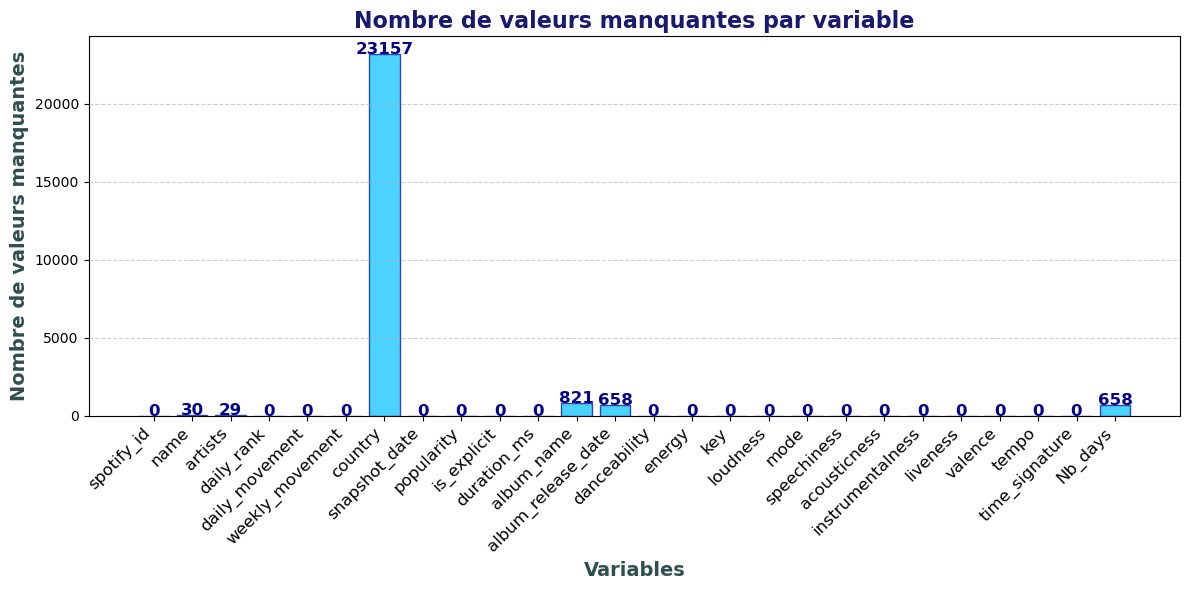

In [18]:
# Calcul du nombre de valeurs manquantes pour chaque colonne
liste_manquante = Base.isna().sum().tolist()

# Création de la figure
plt.figure(figsize=(12, 6))

# Barplot avec un design plus esthétique
bars = plt.bar([i for i in range(len(liste_manquante))], liste_manquante, color='deepskyblue', edgecolor='darkblue', alpha=0.7)

# Ajout des annotations avec ajustement
for i, v in enumerate(liste_manquante):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12, fontweight='bold', color='darkblue')

# Ajouter un titre
plt.title("Nombre de valeurs manquantes par variable", fontsize=16, fontweight='bold', color='midnightblue')

# Ajouter les labels des axes
plt.xlabel("Variables", fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel("Nombre de valeurs manquantes", fontsize=14, fontweight='bold', color='darkslategray')

# Ajouter des grilles subtiles pour mieux repérer les valeurs
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Améliorer les x-ticks pour que les labels ne se chevauchent pas
plt.xticks(range(len(liste_manquante)), Base.columns, rotation=45, ha="right", fontsize=12)

# Ajuster la mise en page pour éviter tout chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()


On observe un pic de valeurs manquantes pour la donnée "Country". Un moyen de pallier à ce manque serait de remplacer les valeurs NaN par le mode (valeur la plus présente). Cependant, il est indiqué que si les valeurs sont NaN pour "Country", on peut utiliser la valeur 'World' qui désigne le top 50 global dans le monde.

On observe également deux colonnes avec le même nombre de valeurs NaN (658). Cela s'explique par le fait que la dernière colonne, qui correspond à Nb_days, dépend entre autre de la variable "album_release_date". Elles ont donc le même nombre de valeurs NaN.

Remplacer les valeurs NaN dans la dernière variable par la médiane pour les variables quantitatives

In [21]:
Base["Nb_days"] = Base["Nb_days"].fillna(Base["Nb_days"].median())
Base_numeric = Base.select_dtypes(include=['int64', 'float64'])
Base["country"] = Base["country"].fillna("WW")

## 2.4 - Visualisation des histogrammes et des boxplots des données quantitatives pour n = 50000 observations

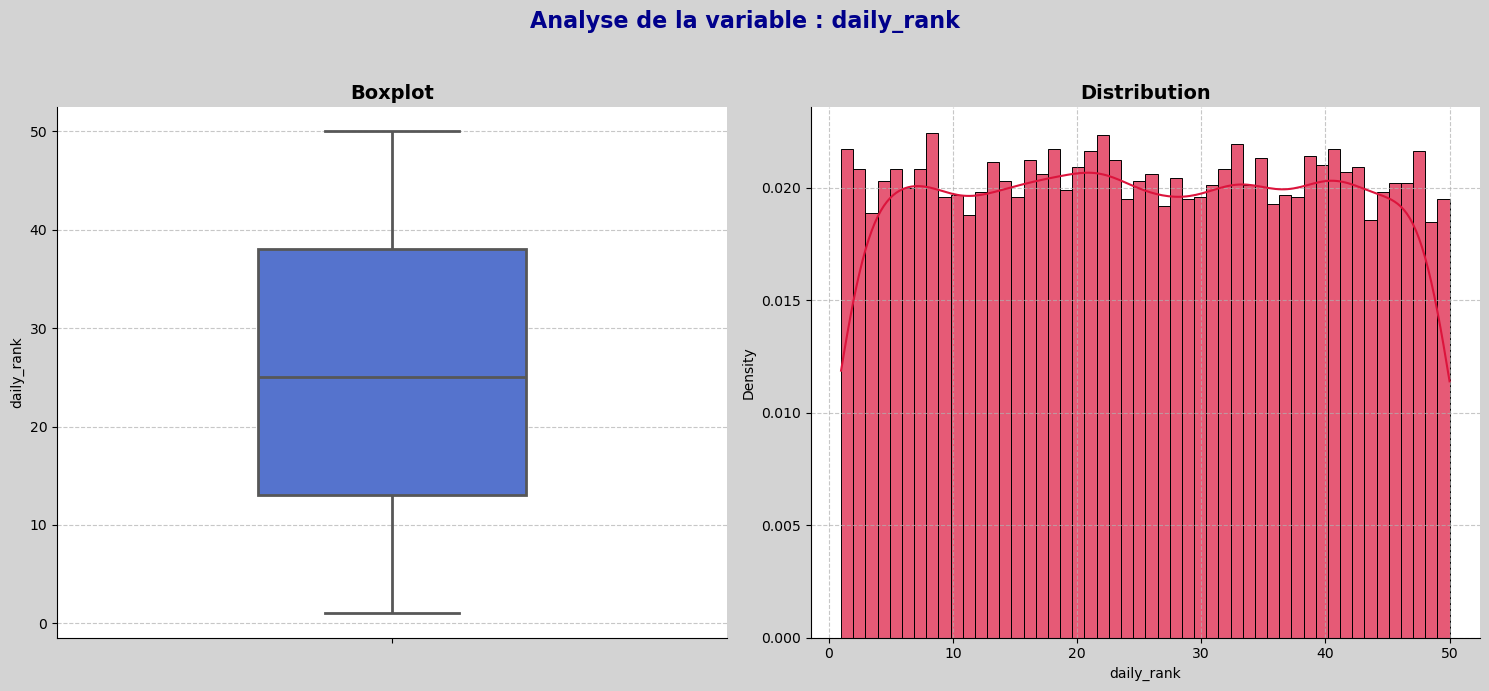

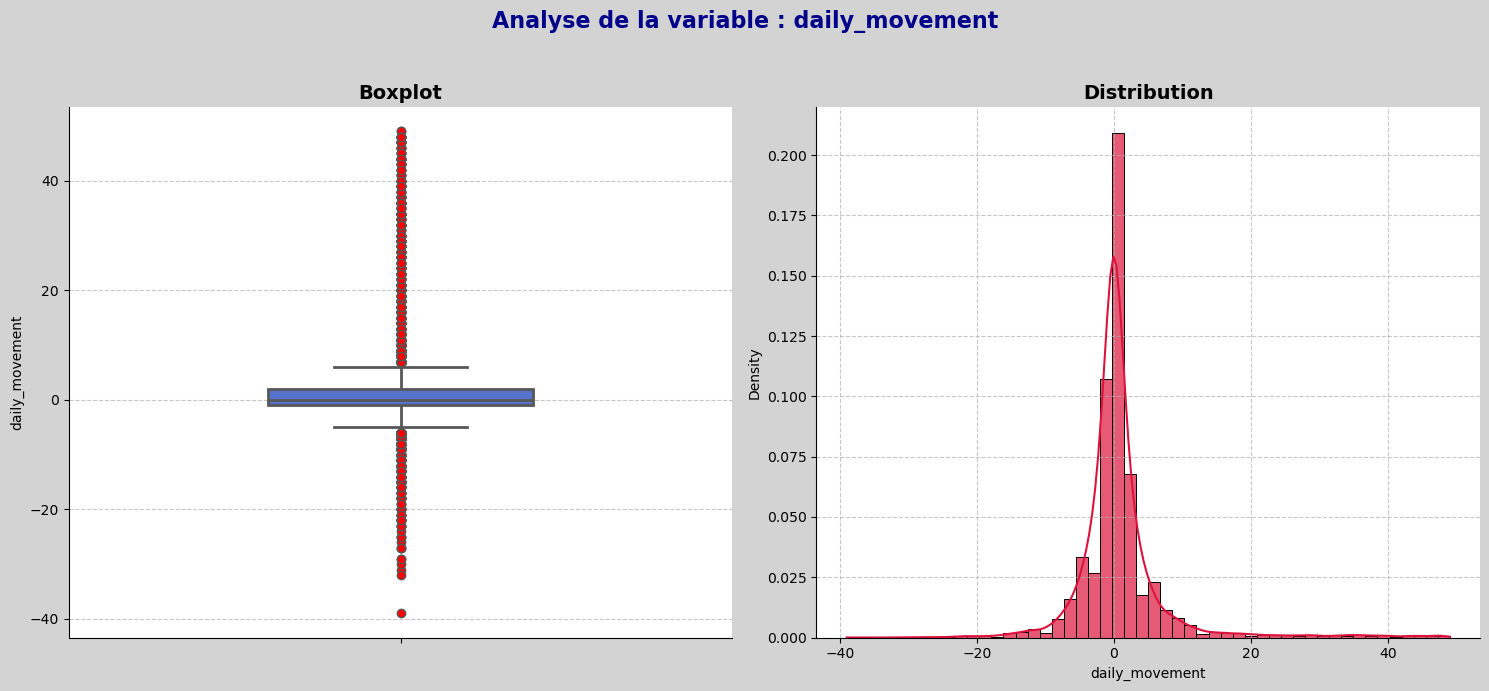

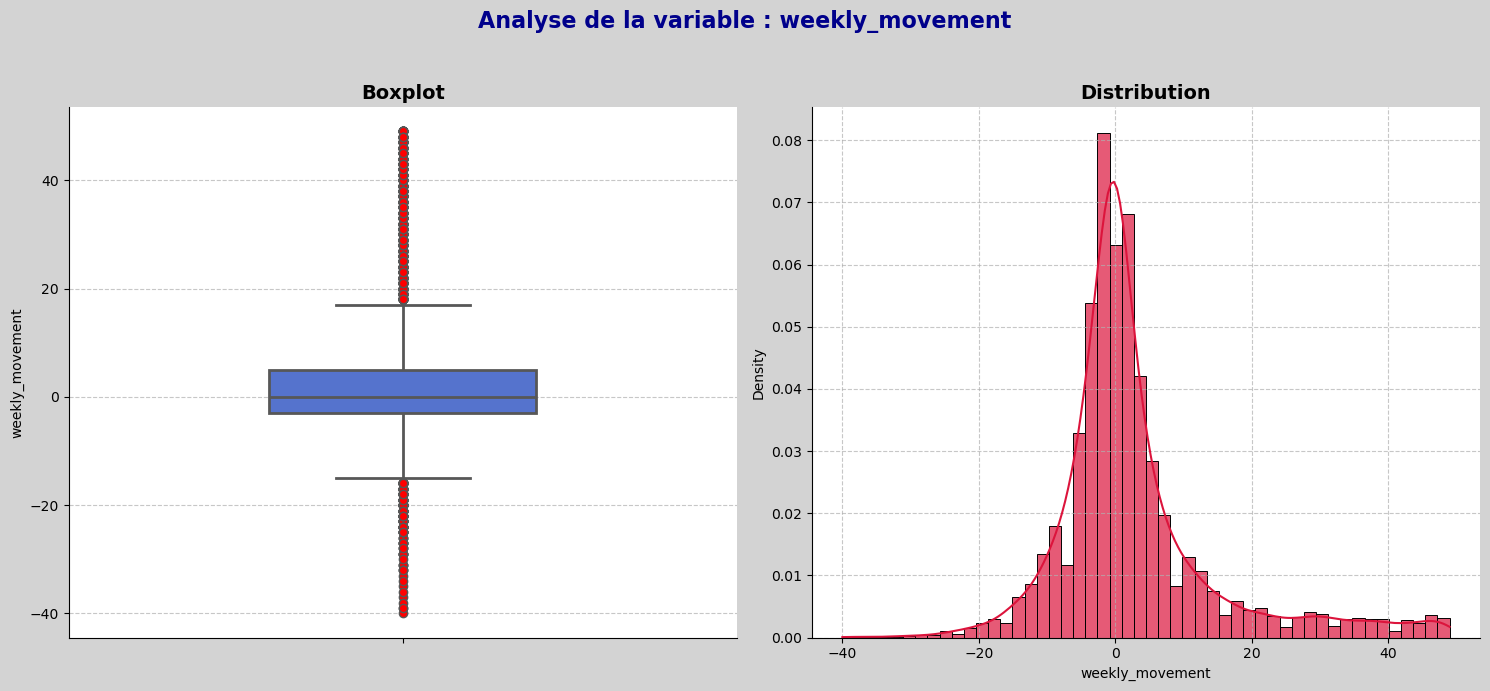

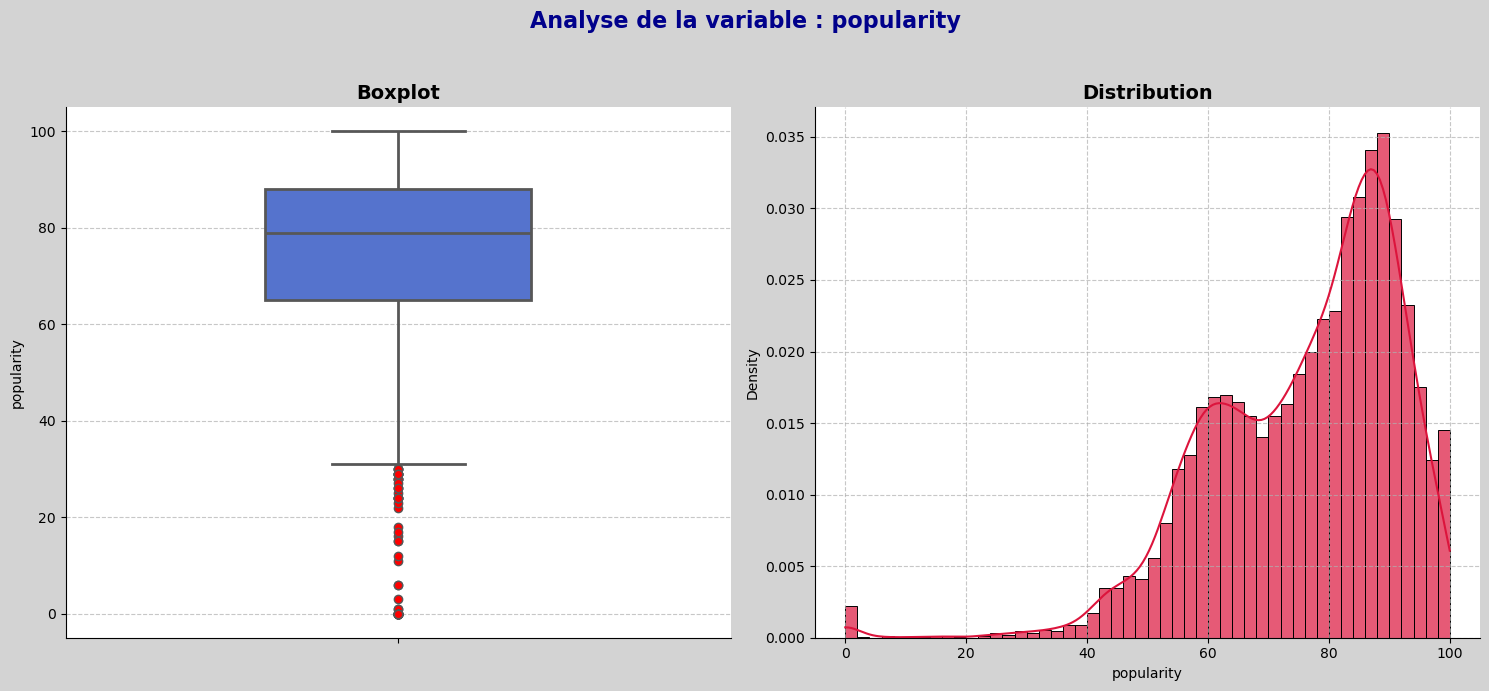

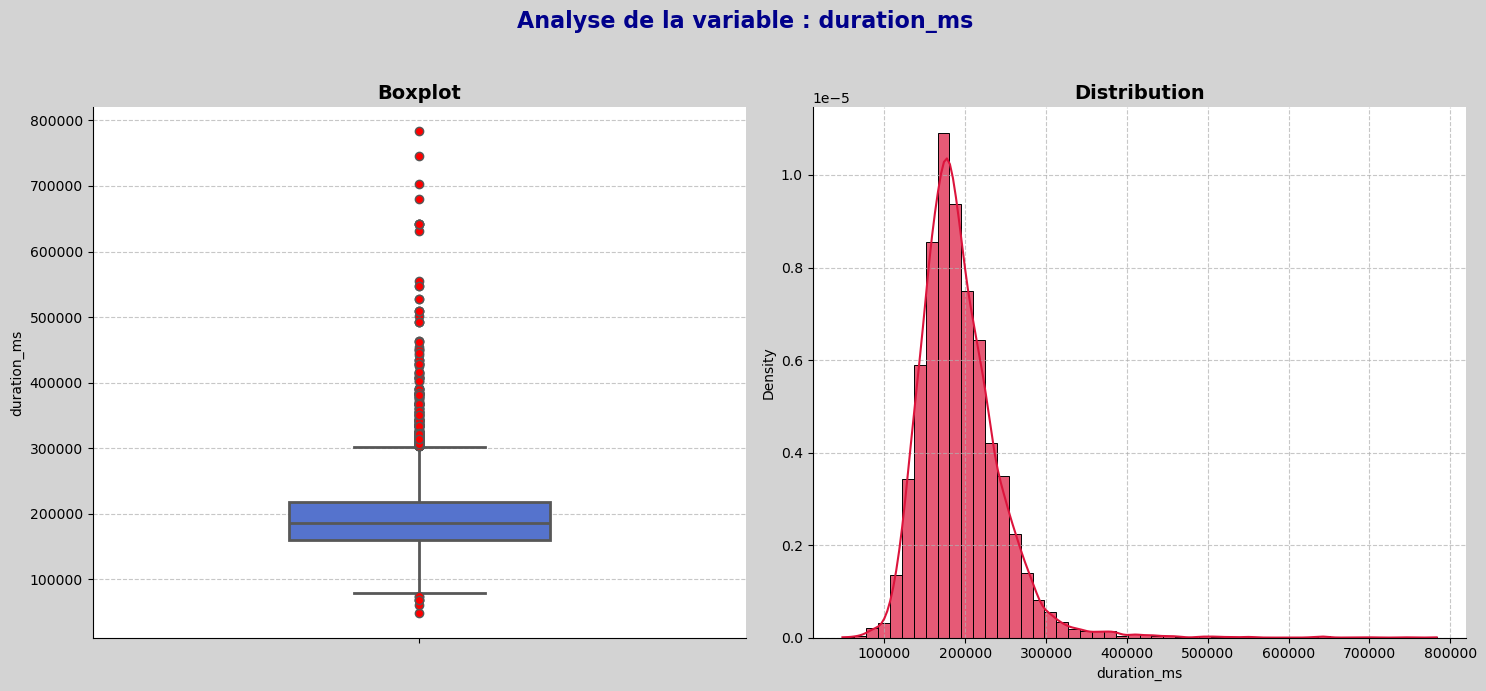

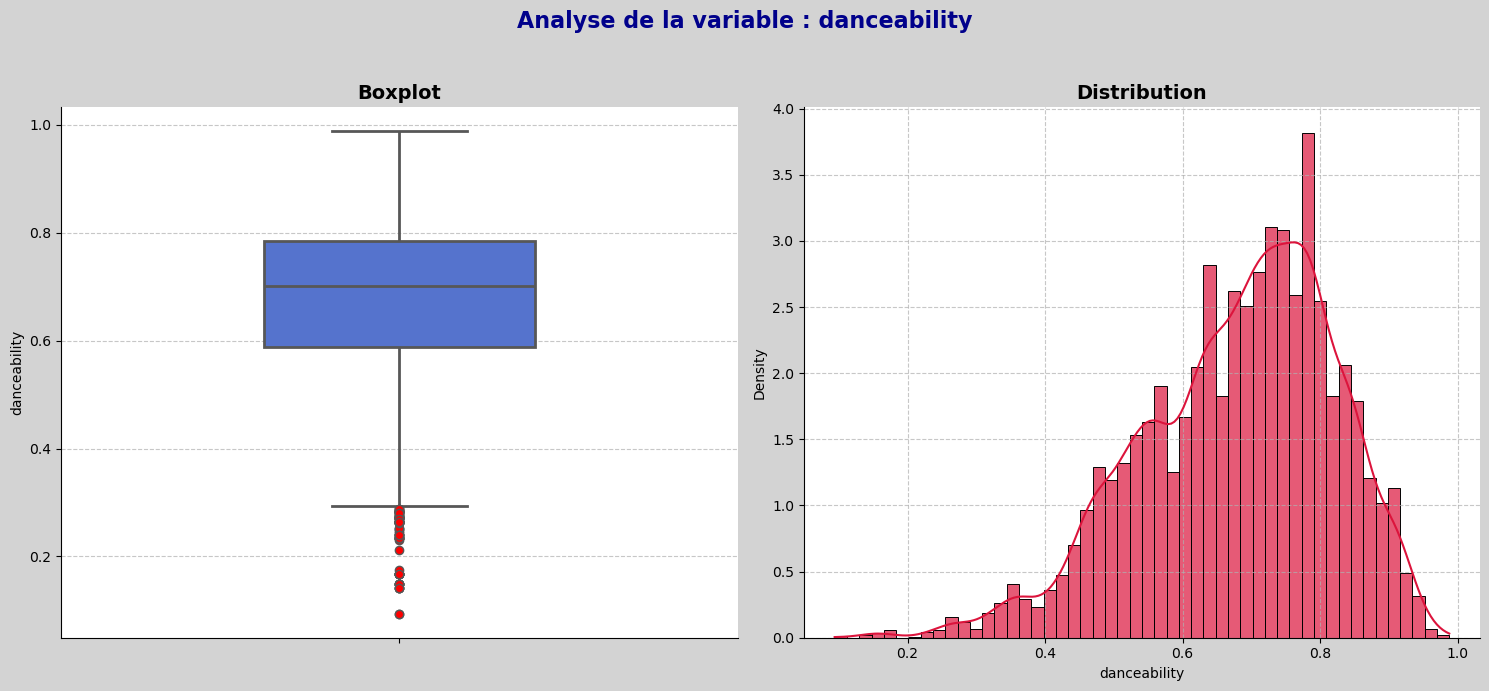

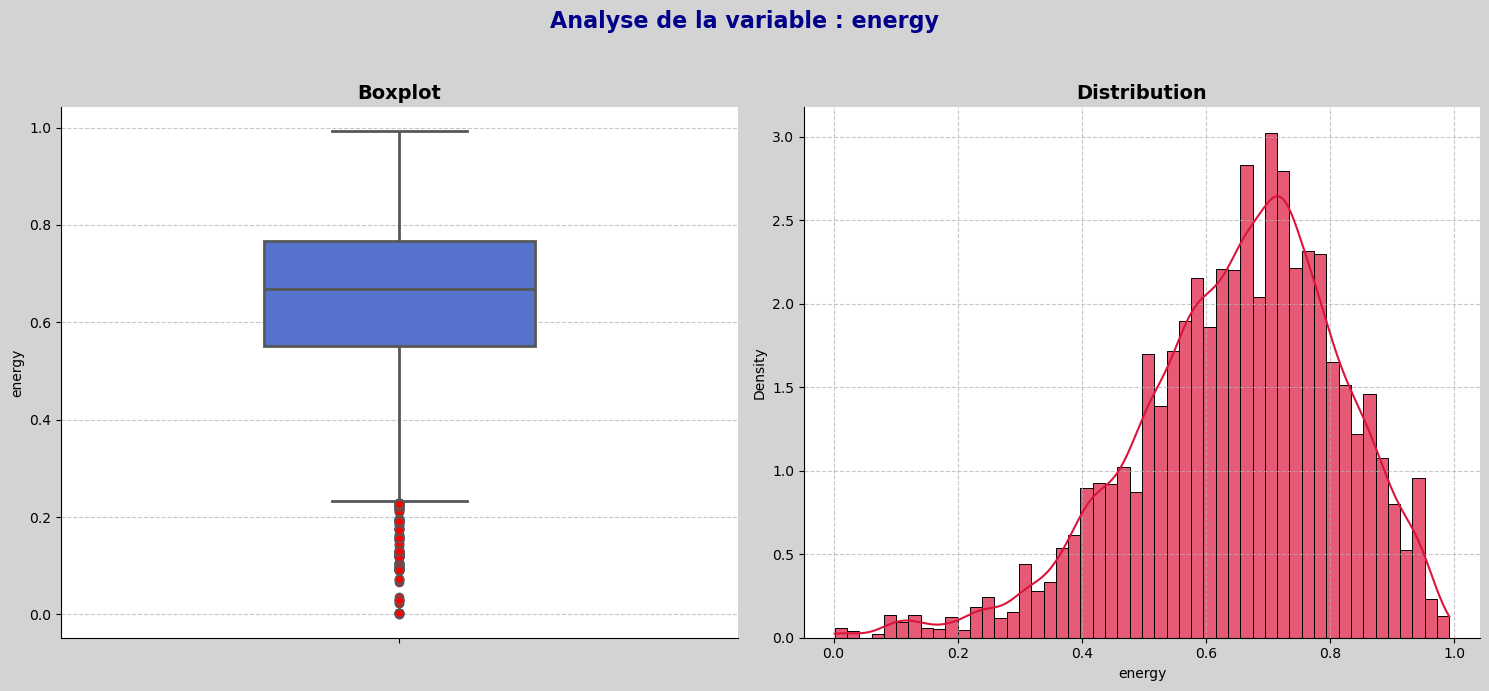

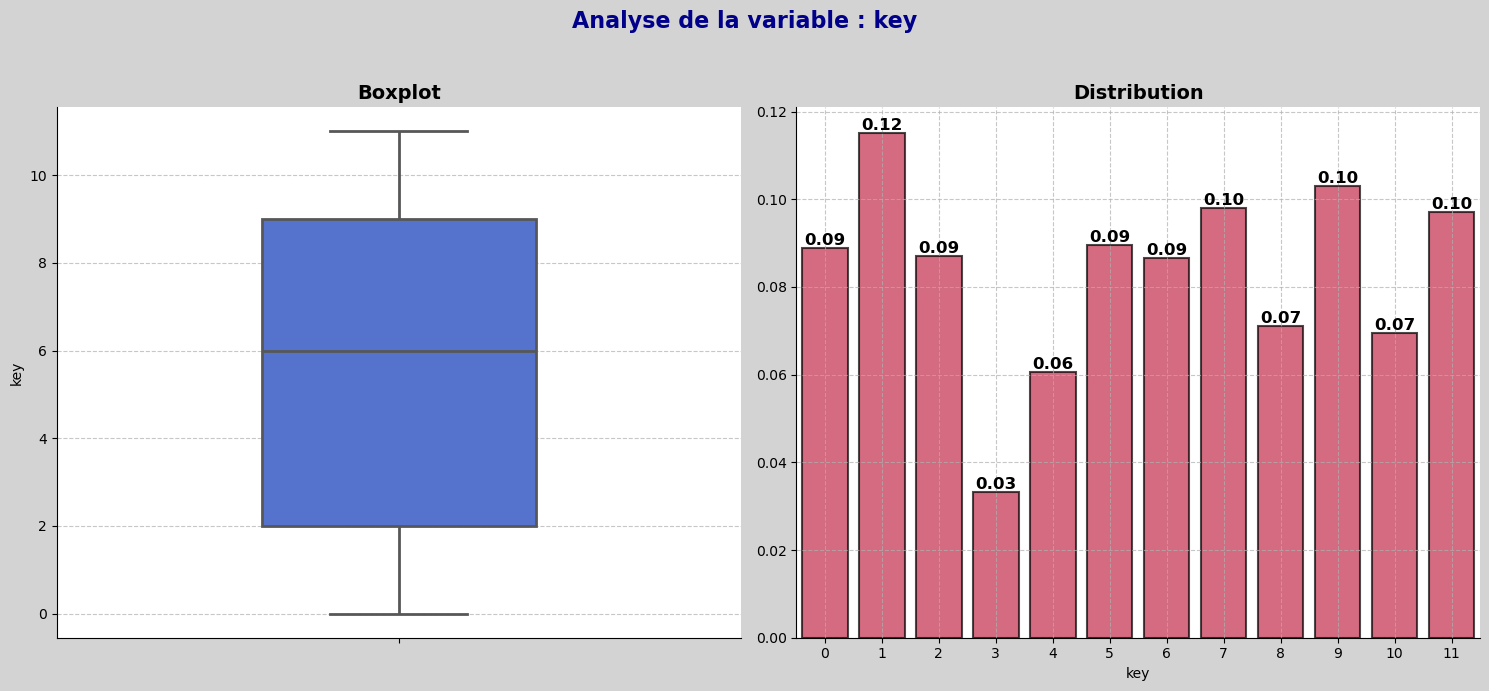

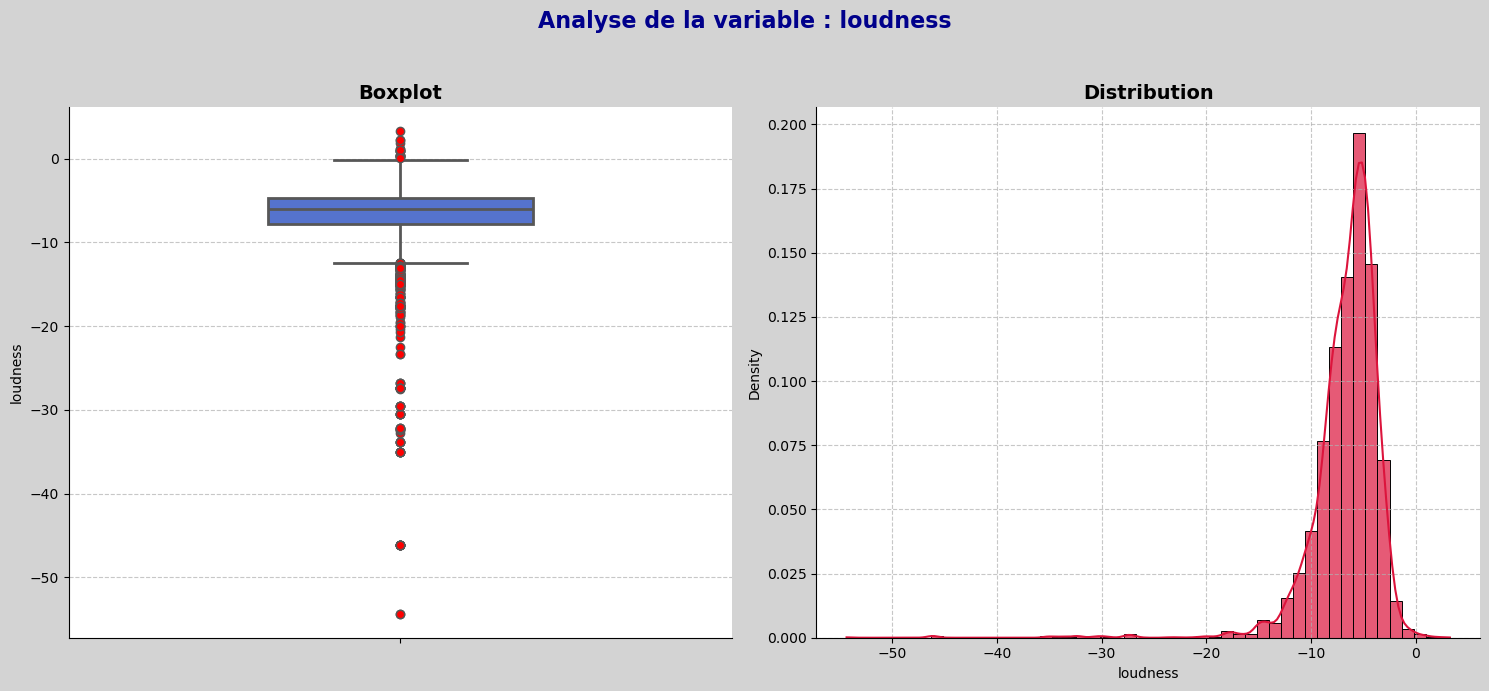

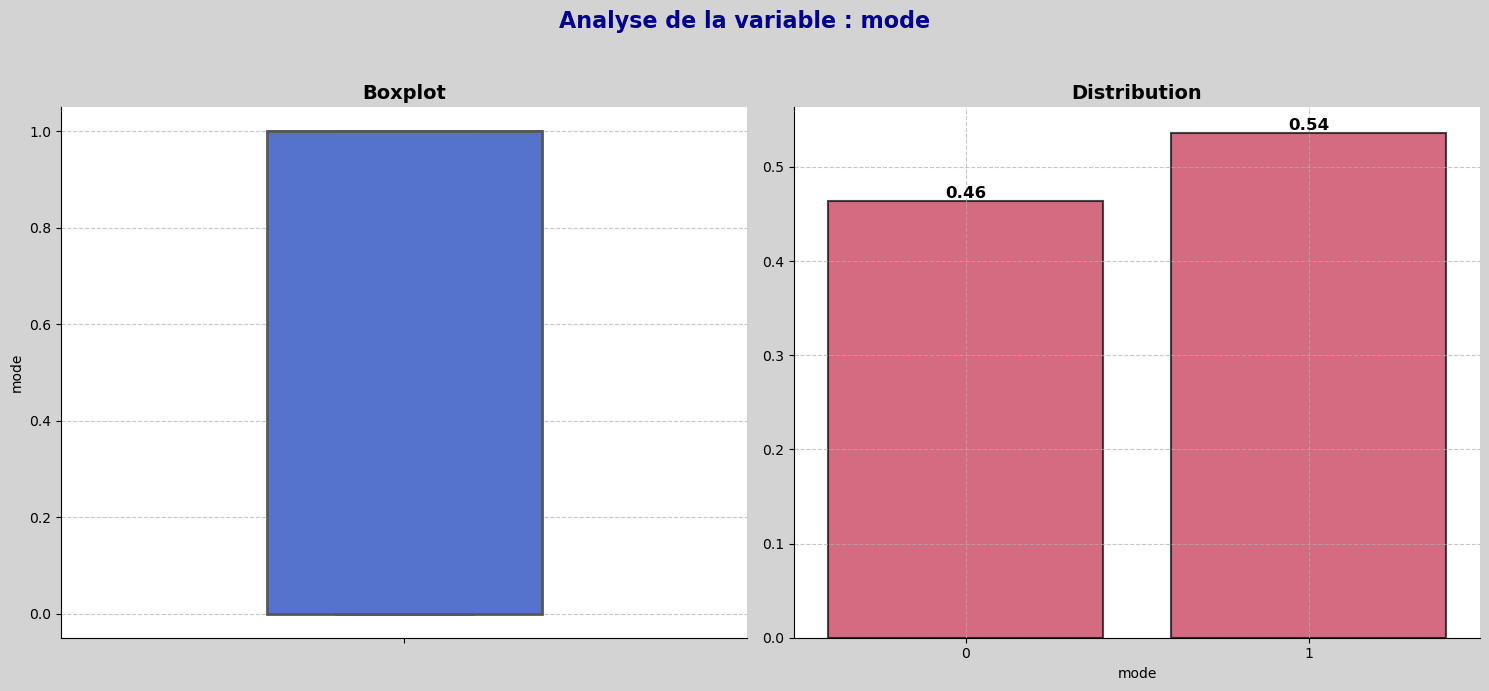

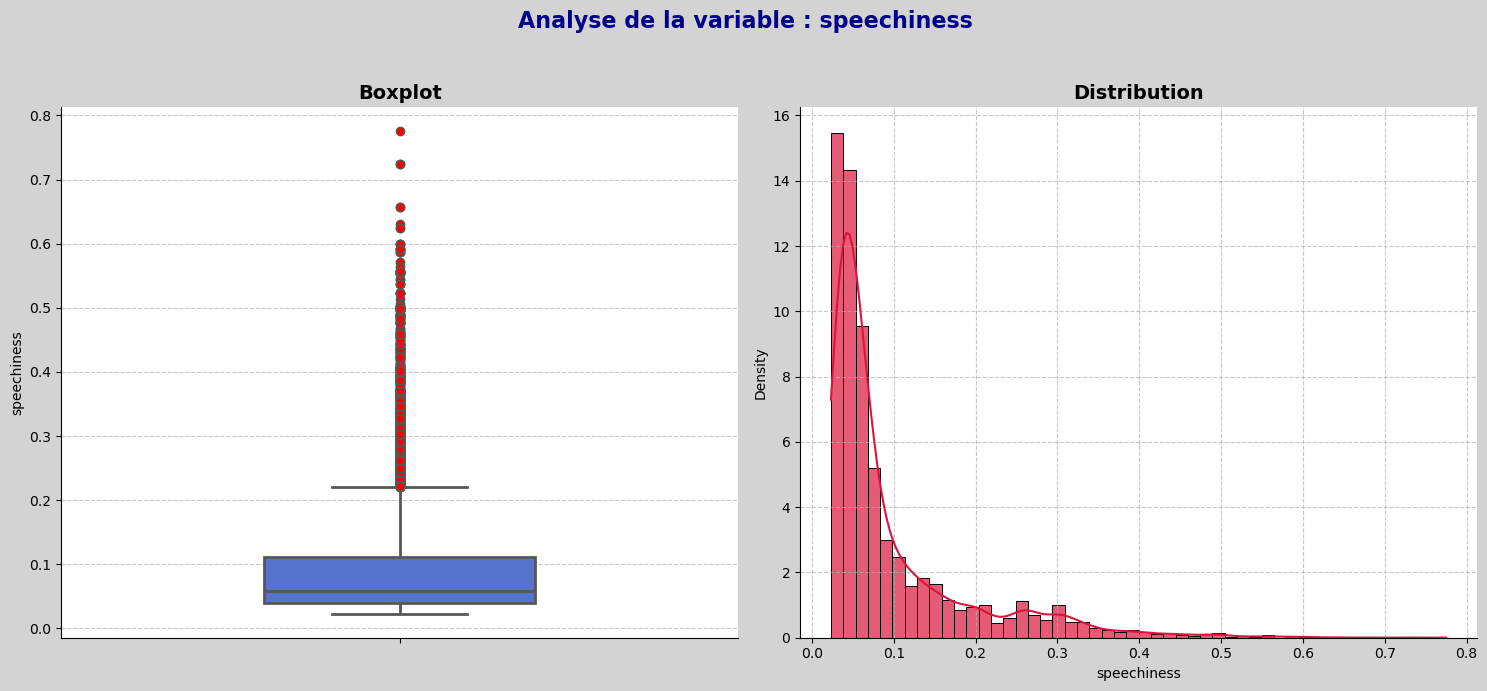

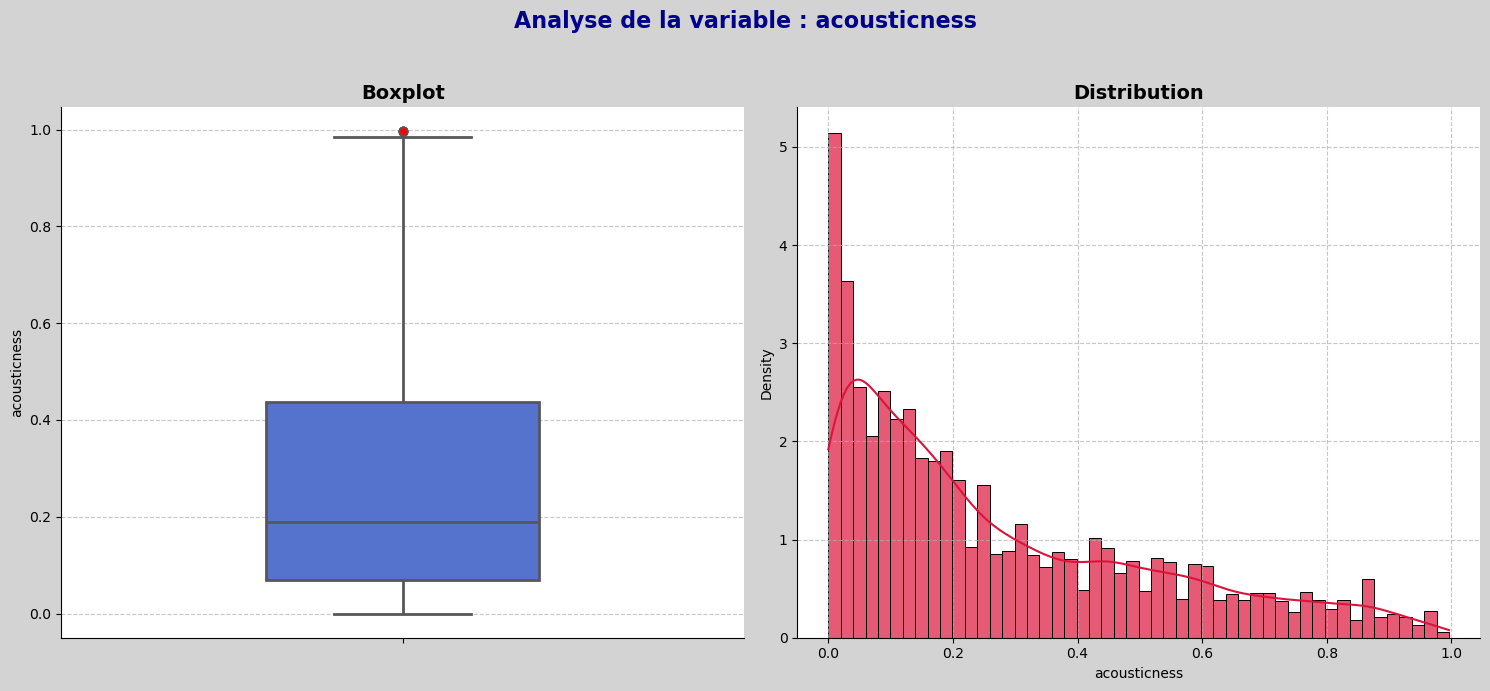

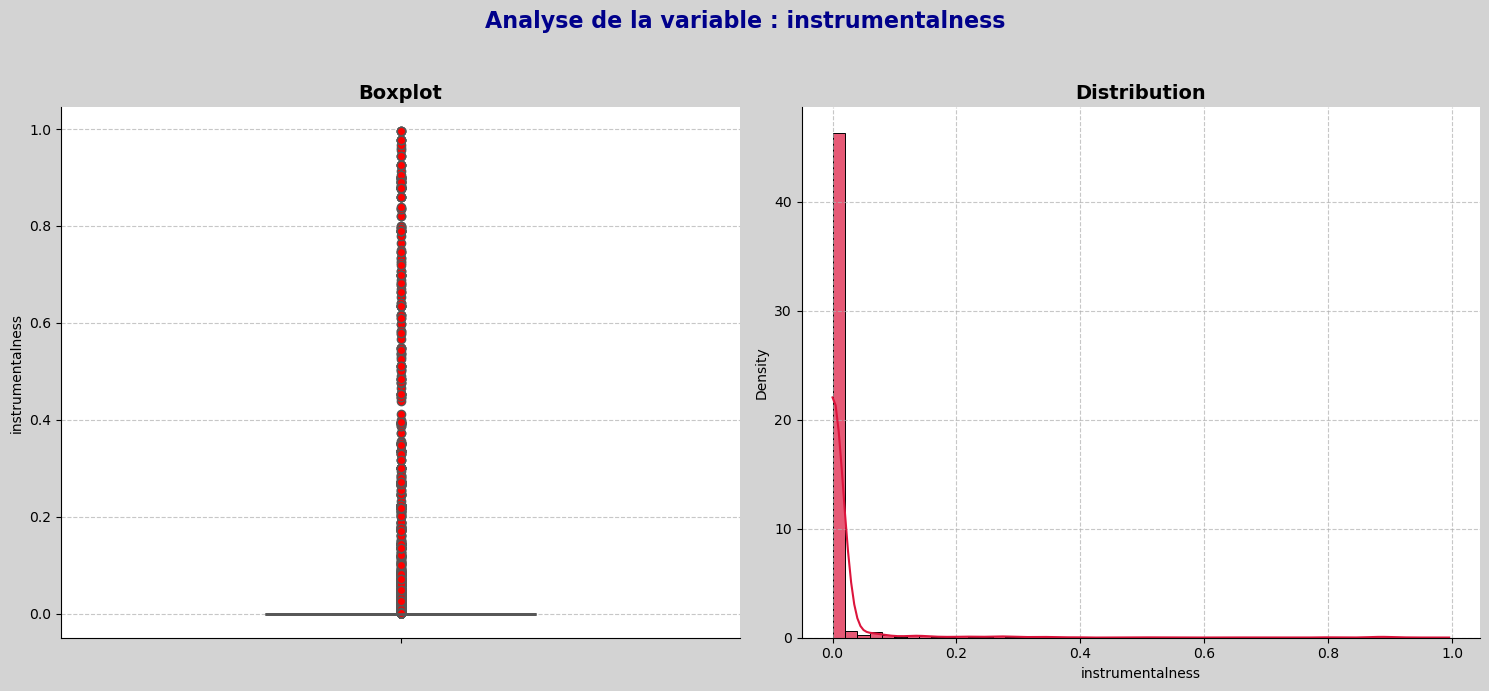

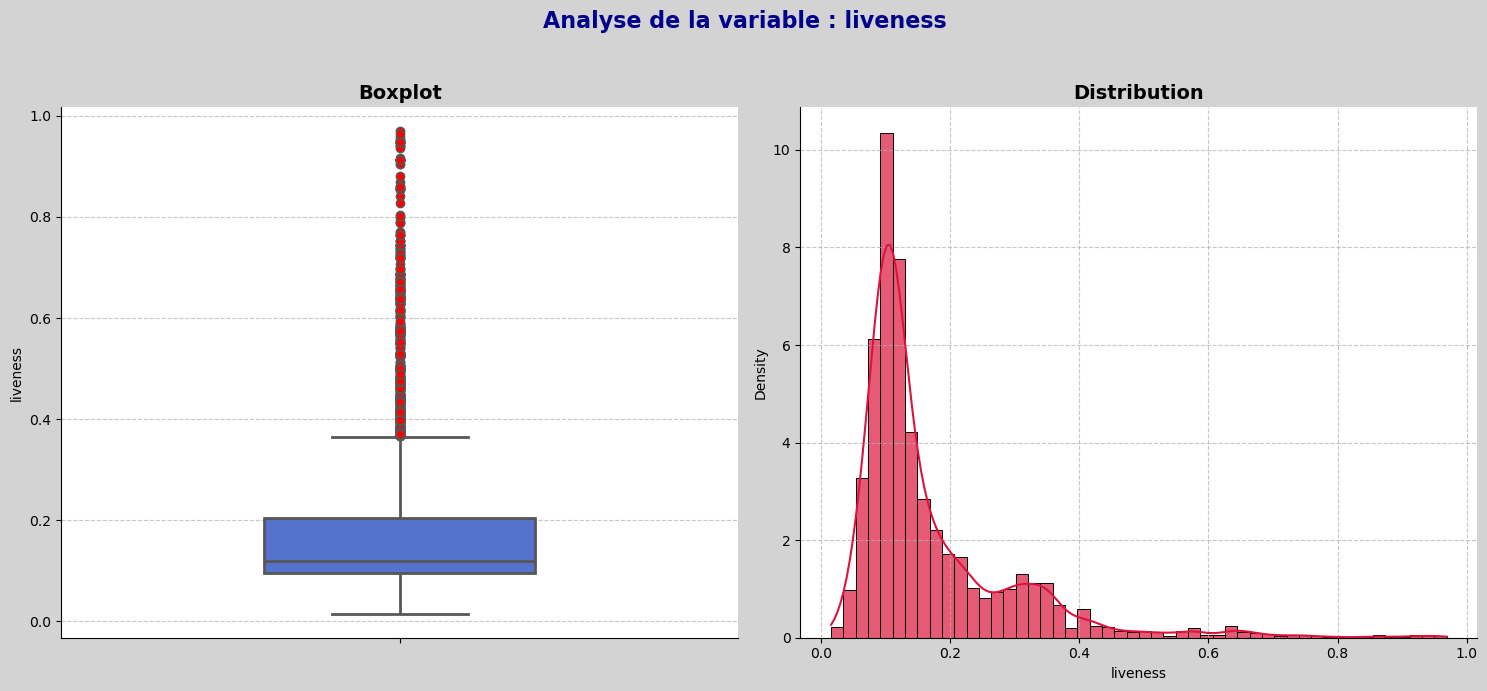

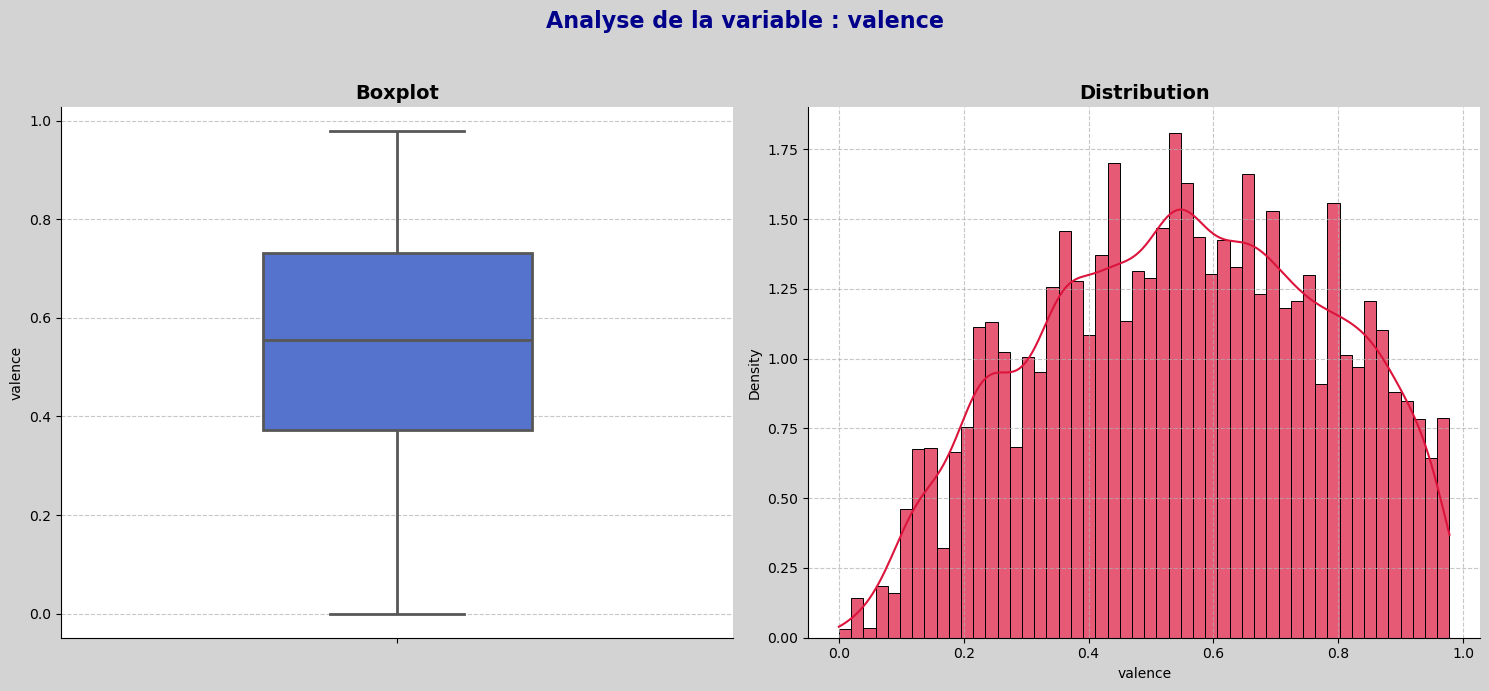

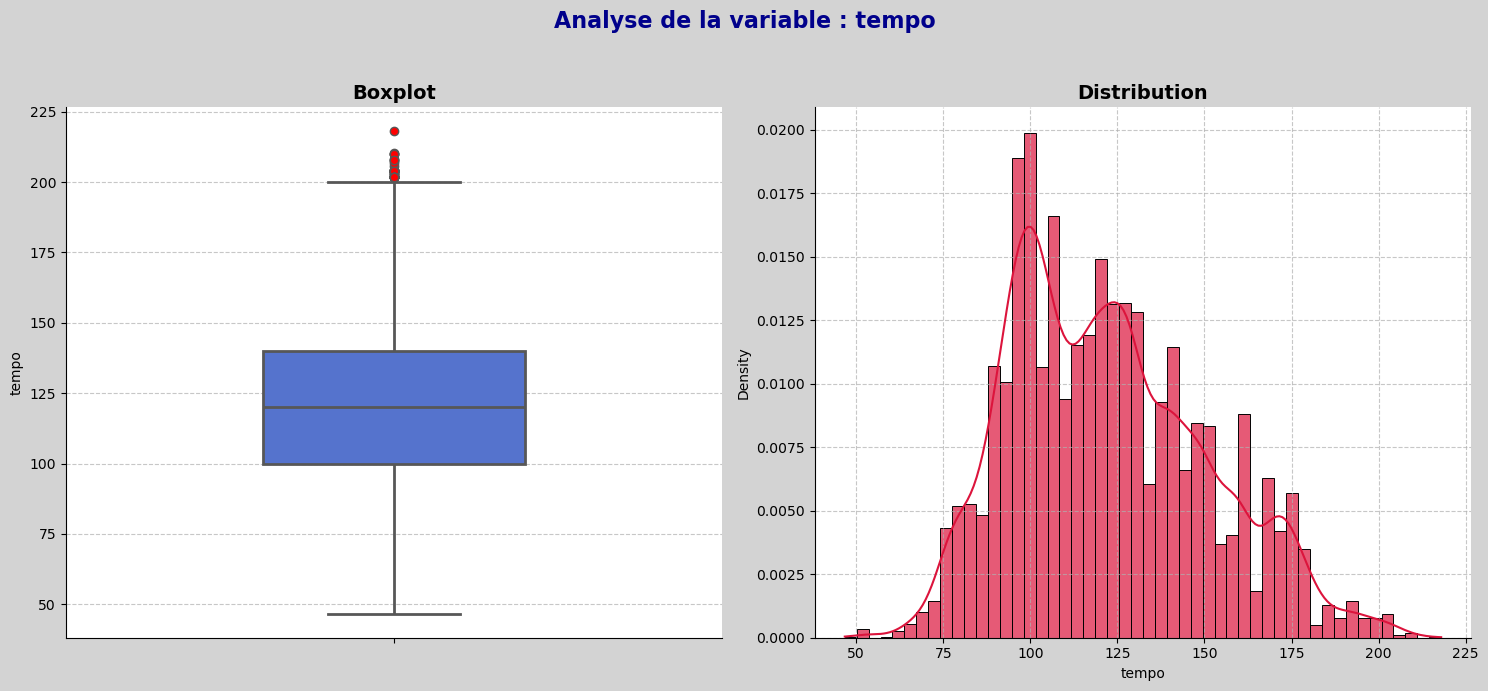

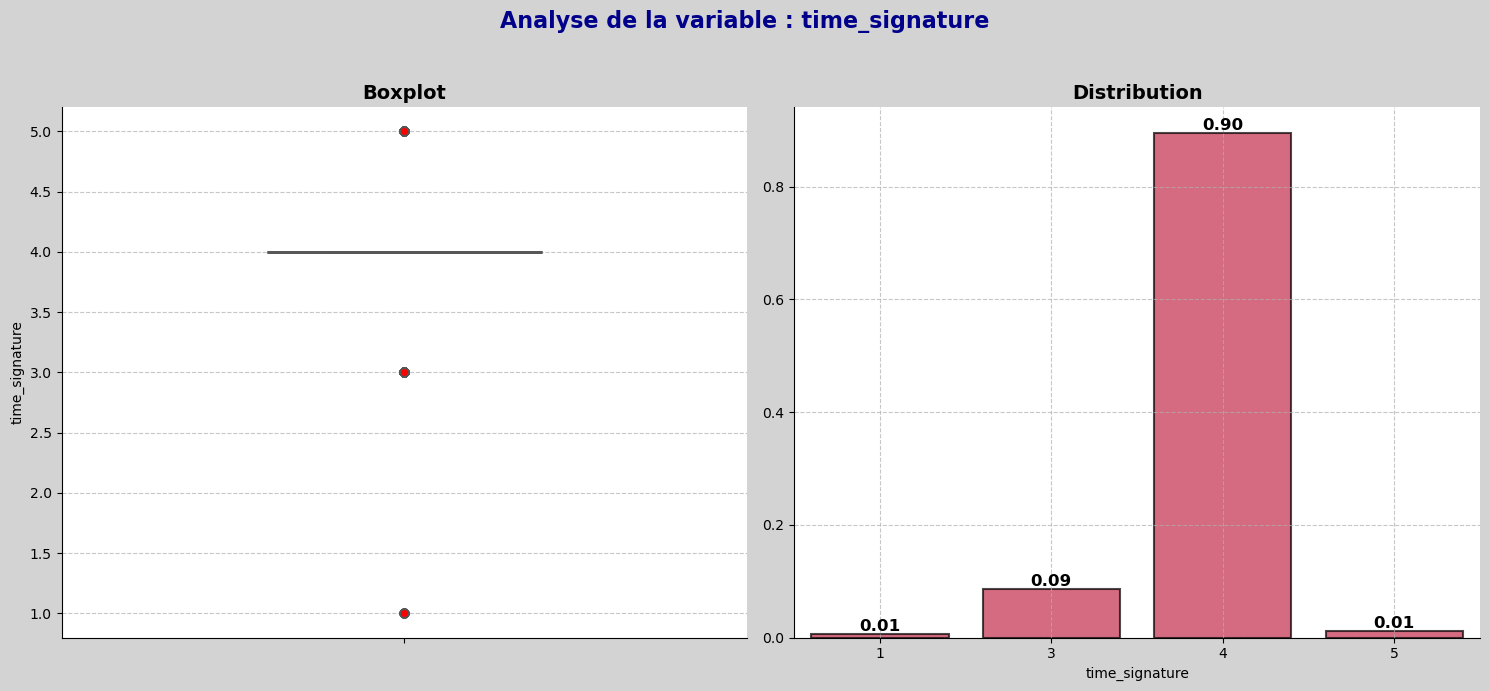

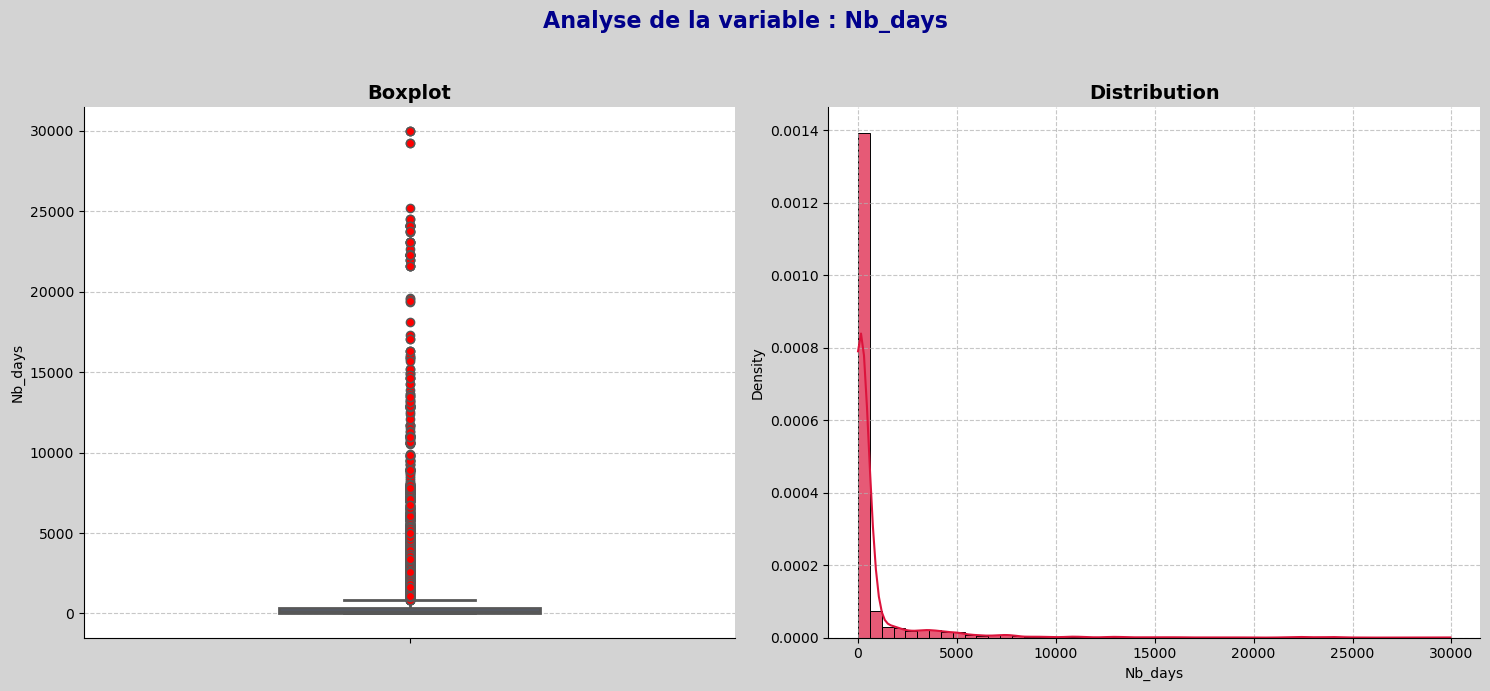

In [23]:
# Fixer la graine pour les résultats reproductibles
np.random.seed(42)

N_experience = 10000  # Nombre d'échantillons

# Sélection des variables quantitatives
Base_numeric = Base.select_dtypes(include=['int64', 'float64'])
Name_Base_num = Base_numeric.columns
n_num, p_num = Base_numeric.shape

# Couleurs personnalisées
box_color = "royalblue"
hist_color = "crimson"

# Création de la visualisation pour chaque variable
for i in range(p_num):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # 1 ligne, 2 colonnes
    fig.patch.set_facecolor('lightgray')
    
    
    # Échantillonnage pour éviter de traiter trop de données
    sample_data = Base_numeric.iloc[:, i].sample(n=N_experience, random_state=42)

    # Titre principal
    fig.suptitle(f"Analyse de la variable : {Name_Base_num[i]}", fontsize=16, fontweight='bold', color="darkblue")

    # **Boxplot**
    sns.boxplot(y=sample_data, width=0.4, linewidth=2, color=box_color,
                flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6}, ax=axes[0])
    
    axes[0].set_title("Boxplot", fontsize=14, fontweight='bold')
    axes[0].grid(axis="y", linestyle="--", alpha=0.7)  # Grille légère

    # **Histogramme ou Barplot**
    data_num_type = sample_data.dtype
    if np.issubdtype(data_num_type, np.integer) and len(np.unique(sample_data)) <= 15:
        # Barplot pour données discrètes
        int_counts = sample_data.value_counts().sort_index()
        
        # Normaliser les données pour obtenir des densités
        total_count = int_counts.sum()
        normalized_counts = int_counts / total_count  # Convertir en densité

        sns.barplot(x=normalized_counts.index, y=normalized_counts.values, ax=axes[1],  
                    color=hist_color, alpha=0.7, edgecolor="black", linewidth=1.5)

        # Ajout des valeurs sur les barres
        for p in axes[1].patches:
            axes[1].annotate(f'{p.get_height():.2f}', 
                             (p.get_x() + p.get_width() / 2., p.get_height()),  
                             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
        
    else:
        # Histogramme avec courbe KDE pour données continues
        sns.histplot(sample_data, kde=True, bins=50, stat="density", ax=axes[1], 
                     color=hist_color, alpha=0.7, edgecolor="black")
        
    axes[1].set_title("Distribution", fontsize=14, fontweight='bold')
    axes[1].grid(axis="x", linestyle="--", alpha=0.7)  # Grille pour l'axe x
    axes[1].grid(axis="y", linestyle="--", alpha=0.7)  # Grille pour l'axe y

    # Ajustements finaux
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuster la disposition pour éviter le chevauchement avec le titre
    sns.despine()
    plt.show()

# **3 - ACP et analyse**
## 3.1 - ACP

On réalise une ACP sur les variables quantitatives afin d'observer la possible corrélation entre elles. Cela nous permet d'estimer les variables les plus intéressantes pour la régression linéaire.

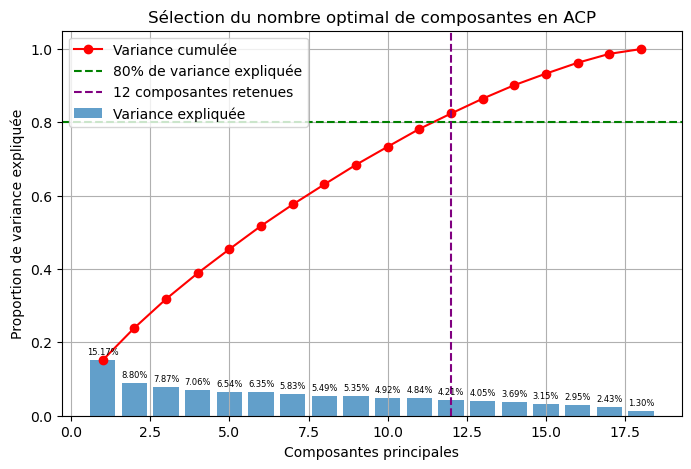

In [26]:
X = Base_numeric.to_numpy()

# Centrer les données et réduire les données
X_mean = np.nanmean(X, axis=0)
X_ecart_type = np.nanstd(X, axis=0)
X_centered_reduced = (X - X_mean) / X_ecart_type

# Matrice de corrélation
corr_matrix = pd.DataFrame(X_centered_reduced).corr()
valeurs_propres, vecteurs_propres = np.linalg.eig(corr_matrix)

# Tri des valeurs propres et des vecteurs propres et selon la base
indices_triees = np.argsort(valeurs_propres)[::-1]  # Tri décroissant des indices des valeurs propres
valeurs_propres_triees = valeurs_propres[indices_triees]  # Valeurs propres triées
vecteurs_propres_triees = vecteurs_propres[:, indices_triees]  # Vecteurs propres associés triés
Base_numeric_triee = Base_numeric.iloc[:, indices_triees]

# Calcul de la variance expliquée
variance_expliquee = valeurs_propres_triees / np.sum(valeurs_propres_triees)
variance_cumulee = np.cumsum(variance_expliquee)

# Déterminer le nombre de composantes pour atteindre 80% de variance expliquée
seuil = 0.80 
nb_composantes = np.argmax(variance_cumulee >= seuil) + 1  # Première valeur dépassant le seuil

# Création du graphique
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(valeurs_propres) + 1), variance_expliquee, alpha=0.7, label="Variance expliquée")
plt.plot(range(1, len(valeurs_propres) + 1), variance_cumulee, marker='o', linestyle='-', color='red', label="Variance cumulée")

# Ajout d'une ligne horizontale pour le seuil
plt.axhline(y=seuil, color='green', linestyle='--', label=f"{int(seuil * 100)}% de variance expliquée")

# Annotation pour le nombre optimal de composantes
plt.axvline(x=nb_composantes, color='purple', linestyle='--', label=f"{nb_composantes} composantes retenues")

# Ajouter les pourcentages de variance expliquée sur les barres
for i, v in enumerate(variance_expliquee):
    plt.text(i + 1, v + 0.01, f"{v*100:.2f}%", ha='center', va='bottom', fontsize=6, color='black')

plt.xlabel("Composantes principales")
plt.ylabel("Proportion de variance expliquée")
plt.title("Sélection du nombre optimal de composantes en ACP")
plt.legend()
plt.grid()

# Affichage du graphique
plt.show()

## 3.2 - Matrice de corrélation

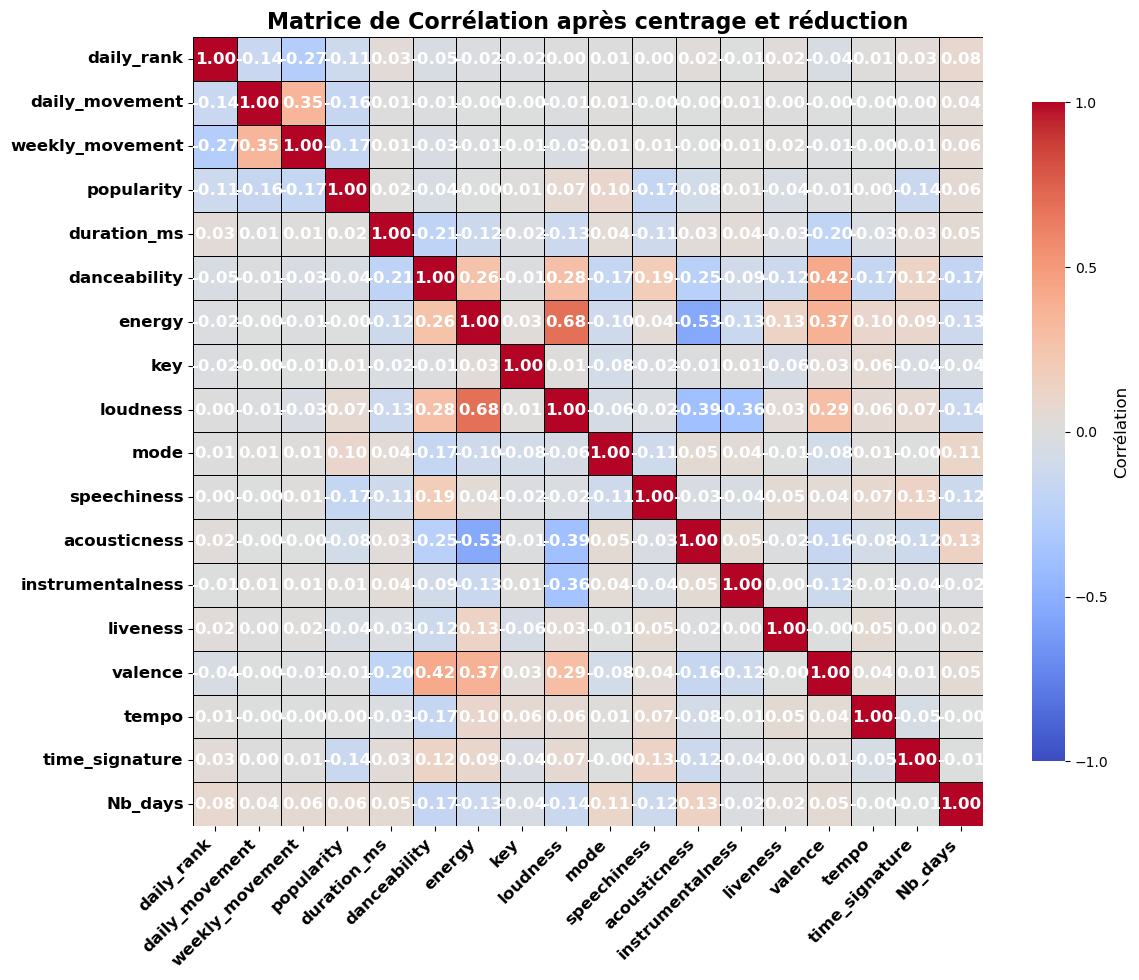

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la figure pour afficher la heatmap
plt.figure(figsize=(12, 10))  # Taille de la figure

# Affichage de la heatmap avec des améliorations esthétiques
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
                      vmin=-1, vmax=1, cbar_kws={"shrink": 0.8, "label": "Corrélation"}, 
                      square=True, xticklabels=Base_numeric.columns, 
                      yticklabels=Base_numeric.columns, 
                      annot_kws={"size": 12, "weight": "bold", "color": "white"},  # Style des annotations
                      linecolor='black', linewidth=0.7)  

# Ajustement des labels des axes pour qu'ils soient bien lisibles
plt.xticks(rotation=45, ha='right', fontsize=12, color="black", fontweight='bold')
plt.yticks(rotation=0, ha='right', fontsize=12, color="black", fontweight='bold')

# Personnaliser la barre de couleur
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])  # Définir les ticks sur la barre de couleur
cbar.set_label('Corrélation', fontsize=12)

# Titre
plt.title('Matrice de Corrélation après centrage et réduction', fontsize=16, fontweight='bold')

# Ajuster l'espacement pour éviter les chevauchements
plt.tight_layout()

# Affichage
plt.show()


## 3.3 - Matrice de composante principal

<Figure size 1000x1000 with 0 Axes>

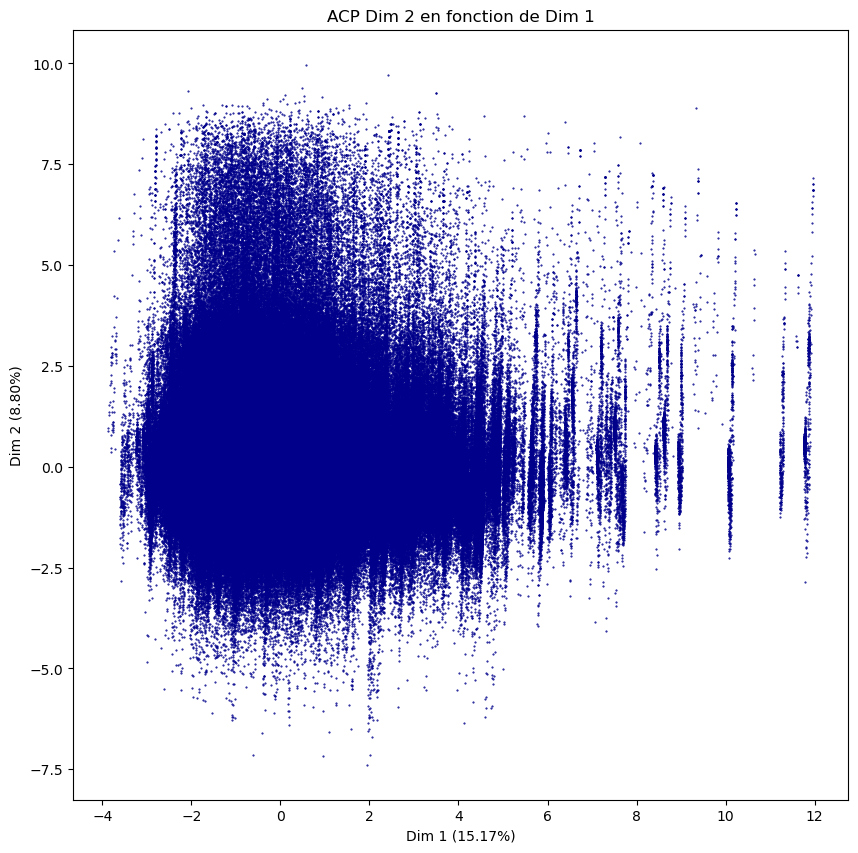

In [30]:
# Projeter les données dans l'espace des composantes principales
plt.rcParams['agg.path.chunksize'] = 1700000
X_projete = np.dot(X_centered_reduced, vecteurs_propres)

# Création du graphique
plt.figure(figsize=(10, 10))

for i, col_i in enumerate(Base_numeric_triee.columns):
    for j , col_j in enumerate(Base_numeric_triee.columns):
        if i == 0 and j == 1: 
            plt.figure(figsize=(10, 10))
            plt.plot(X_projete[:, i], X_projete[:, j], linestyle='', marker='o', markersize=0.5, color="darkblue", alpha=1)
            
            # Ajouter le pourcentage de variance expliquée pour les composantes principales
            plt.xlabel(f"Dim {i+1} ({variance_expliquee[i] * 100:.2f}%)")
            plt.ylabel(f"Dim {j+1} ({variance_expliquee[j] * 100:.2f}%)")
            
            plt.title(f"ACP Dim {j+1} en fonction de Dim {i+1}")
            plt.show()

### 3.4 - Cercle de Corrélation

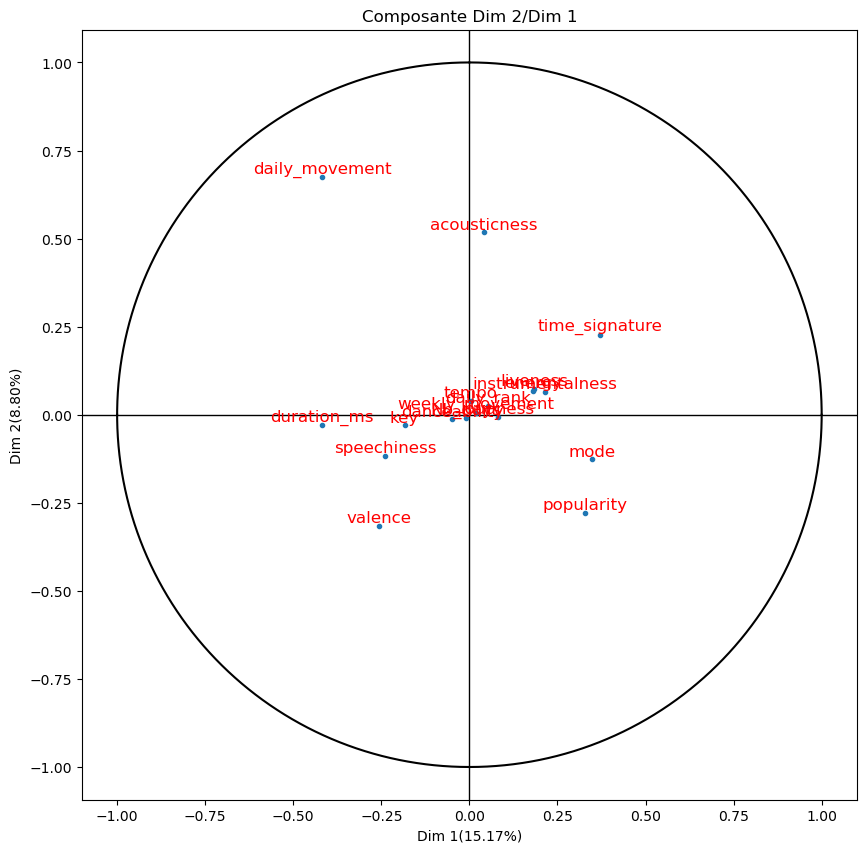

In [32]:
# Trier les colonnes de Base_numeric selon les indices triés des composantes principales
Base_numeric_triee = Base_numeric.iloc[:, indices_triees]  # Trier les colonnes de Base_numeric en fonction du tri des composantes

# Cercle de corrélation :
corr_matrix = pd.DataFrame(X_centered_reduced).corr().to_numpy()
coord = vecteurs_propres_triees[:, :len(corr_matrix)] * np.sqrt(valeurs_propres_triees[:len(corr_matrix)])

def cercle_ligne(nb_point):
    x = np.linspace(0, 1, nb_point)
    y = np.sqrt(1 - x**2)
    plt.plot(x, y, color="black")
    plt.plot(x, -y, color="black")
    plt.plot(-x, y, color="black")
    plt.plot(-x, -y, color="black")
    # Ajouter les lignes des axes
    plt.axhline(0, color='black', linewidth=1)  # Ligne horizontale (axe des ordonnées)
    plt.axvline(0, color='black', linewidth=1)  # Ligne verticale (axe des abscisses)

# Afficher les graphes pour chaque paire de composantes principales
for i, col_i in enumerate(Base_numeric_triee.columns):  # Utilisation des colonnes triées
    for j, col_j in enumerate(Base_numeric_triee.columns):
        if i == 0 and j == 1:
            plt.figure(figsize=(10, 10))
            cercle_ligne(1000000)
            
            # Tracer les coordonnées
            plt.plot(coord[i], coord[j], ".")
            
            # Ajouter le texte pour chaque variable sur le cercle
            for idx, name in enumerate(Base_numeric_triee.columns):
                plt.text(coord[i, idx], coord[j, idx], name,
                         color='red', ha='center', va='bottom', fontsize=12)
            
            # Ajouter les annotations avec le pourcentage de variance expliquée sur les axes
            plt.xlabel(f"Dim {i+1}({100 * variance_expliquee[i]:.2f}%)")
            plt.ylabel(f"Dim {j+1}({100 * variance_expliquee[j]:.2f}%)")
            
            plt.title(f"Composante Dim {j+1}/Dim {i+1}")
            plt.axis('equal')
            plt.show()

# **4 - Régression multiple**
---

## Modèle de régression linéaire multiple

Le modèle de régression linéaire multiple est donné par l'équation suivante :

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_k X_k + \varepsilon
$$

Où :
- $Y$ est la variable dépendante (ou expliquée),
- $X_1, X_2, \dots, X_k$ sont les variables explicatives (ou indépendantes),
- $\beta_0$ est l'ordonnée à l'origine (intercept),
- $\beta_1, \beta_2, \dots, \beta_k$ sont les coefficients de régression associés à chaque variable explicative,
- $\varepsilon$ est l'erreur aléatoire (ou terme de perturbation).

### Matrice des variables explicatives $X$

La matrice $X$ est constituée de toutes les variables explicatives $X_1, X_2, \dots, X_k$, ainsi que d'une colonne de 1 pour l'intercept $\beta_0$. Elle se présente sous la forme :

$$
X = \begin{pmatrix}
1 & X_{11} & X_{12} & \cdots & X_{1k} \\
1 & X_{21} & X_{22} & \cdots & X_{2k} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & X_{n1} & X_{n2} & \cdots & X_{nk} \\
\end{pmatrix}
$$

### Estimation des coefficients $\beta$

Les coefficients $\beta_0, \beta_1, \dots, \beta_k$ sont estimés par la méthode des moindres carrés (MC), qui minimise la somme des carrés des résidus. L'estimation des coefficients $\hat{\beta}$ est donnée par :

$$
\hat{\beta} = (X^T X)^{-1} X^T Y
$$

Où :
- $X$ est la matrice des variables explicatives (de dimension $n \times (k+1)$, où $n$ est le nombre d'observations et $k$ est le nombre de variables explicatives),
- $Y$ est le vecteur des valeurs observées de la variable dépendante (de dimension $n \times 1$),
- $\hat{\beta}$ est le vecteur des coefficients estimés (de dimension $(k+1) \times 1$).

## 4.1 - Création du modèle

In [36]:
# Fixer la graine pour la reproductibilité
np.random.seed(42)

# Charger les données (Base_numeric doit être un DataFrame Pandas)
X = Base_numeric.to_numpy()
n, p_ = X.shape

# Définir Y comme la 5e colonne (popularity)
Y = X[:, 4]

# Supprimer la colonne 5 pour définir X_e
X_e = np.delete(X, 4, axis=1)

# Échantillonnage aléatoire
n_r = X.shape[0]
k = min(50000, n_r)
indices = np.random.choice(n_r, k, replace=False)

# Sous-échantillonnage
X_e = X_e[indices, :]
Y_e = Y[indices]  # Assurer qu'on garde les mêmes indices

# Ajouter une colonne de 1 pour l'intercept
X_e = np.hstack((np.ones((X_e.shape[0], 1)), X_e))

# Calcul des coefficients Beta (Régression linéaire)
Beta, _, _, _ = np.linalg.lstsq(X_e, Y_e, rcond=None)

# estimation
Y_r = X_e @ Beta

# Vérifier si tout est correct
print("Beta:\n", Beta, "\n")
print("Estimations Y_r:\n", Y_r[:10])  # Afficher les 10 premières estimation

Beta:
 [ 2.30793020e+05  7.10221218e+01  5.42230705e+01  1.09120581e+01
  6.39792285e+00 -5.38824076e+04 -5.79846816e+03 -2.40310236e+02
 -1.02495203e+03 -1.14905604e+03 -4.29299954e+04 -1.30706475e+04
 -1.16664251e+04 -1.32682913e+04 -2.54507293e+04 -6.11167545e+01
  6.79339613e+03  3.97895410e-01] 

Estimations Y_r:
 [192630.94584236 185117.37088657 187408.67344509 181598.71931939
 192223.56476742 181371.87557442 185283.91814212 172700.52422892
 207531.2638489  170112.8319698 ]


## Plan d'hypothèse:
1 - Significativité du modèle (Test F)

2 - Linéarité du modèle (Rainbow, Ramsey)

3 - Multicolinéarité (VIF)

4 - Homoscédasticité (Breusch-Pagan, )

5 - Normalité des résidus (Q-Q plot & Jarque-Bera)

6 - Indépendance des résidus (Durbin-Watson)

7 - Transformation du modèle (Box-Cox) (A VOIR)

## 4.2 - Significativité des Beta
---

### 4.2.1 - Analyse des Betas
## Hypothèses du test t pour chaque coefficient $\beta_i $ :

Les hypothèses testées sont :

$$
H_0 : \beta_i = 0 \quad \text{(pas d'effet de la variable explicative correspondante)}
$$
$$
H_1 : \beta_i \neq 0 \quad \text{(l'effet de la variable explicative correspondante est significatif)}
$$

## Calcul de la statistique t

La statistique $ t $ pour chaque coefficient $ \beta_i $ est calculée comme suit :

$$
t_i = \frac{\hat{\beta_i}}{SE(\hat{\beta_i})}
$$

Où :
- $\hat{\beta_i}$ est l'estimation du coefficient $\beta_i$,
- $SE(\hat{\beta_i})$ est l'erreur standard de $\hat{\beta_i}$, qui peut être calculée comme :

$$
SE(\hat{\beta_i}) = \sqrt{\hat{\sigma}^2 \cdot (X^T X)^{-1}_{ii}}
$$

Où :
- $\hat{\sigma}^2$ est l'estimation de la variance des résidus, donnée par :

$$
\hat{\sigma}^2 = \frac{1}{n-k} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


In [40]:
# Régression avec statsmodels
model = sm.OLS(Y_e, X_e).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     253.1
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:10:10   Log-Likelihood:            -6.0885e+05
No. Observations:               50000   AIC:                         1.218e+06
Df Residuals:                   49982   BIC:                         1.218e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.308e+05   3636.384     63.468      0.0

Quel variable rejete ou accepte t on ?
- X1 : daily_rank : **Rejeté**
- X2 : daily_movement : **Accepté**
- X3 : weekly_movement : **Rejeté**
- X4 : duration_ms : **Rejeté**
- X5 : danceability : **Rejeté**
- X6 : energy : **Accepté**
- X7 : key : **Rejeté**
- X8 : loudness : **Rejeté**
- X9 : mode : **Accepté**
- X10 : speechiness : **Rejeté**
- X11 : acousticness : **Rejeté**
- X12 : instrumentalness : **Rejeté**
- X13 : liveness : **Rejeté**
- X14 : valence : **Rejeté**
- X15 : tempo : **Rejeté**
- X16 : time_signature : **Rejeté**
- X17 : Nb_days : **Rejeté**

On peut observer que le modèle est statistiquement significatif car la Prob (F-statistic) = 0 est proche de 0. Cela signifie qu'au moins une des variables explicatives a un effet sur la variable cible Y. 

Cependant, le R² est très faible (0.077). En effet, le modèle n'explique que 7,5% de la variance de la variable cible Y. Il manque probablement des variables importantes, ou alors la relation entre X et Y est non linéaire.

## 4.3 - Test de linéarité
---

## Hypothèses du test de Rainbow

Le test de spécification examine si un modèle de régression est linéaire ou non. Les hypothèses à tester sont :

$$
H_0 : \text{Le modèle est linéaire}
$$

$$
H_1 : \text{Le modèle n'est pas linéaire}
$$

Le test de **Rainbow** est un exemple qui permet de tester cette hypothèse en utilisant la régression polynomiale des résidus.


Le test de Rainbow consiste à étendre ce modèle en introduisant des termes non linéaires de $X$, par exemple des termes quadratiques ou cubiques. Un modèle polynomiale de degré 2, par exemple, serait :

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_k X_k + \gamma_1 X_1^2 + \gamma_2 X_2^2 + \cdots + \gamma_k X_k^2 + \varepsilon
$$

L'objectif est de tester si les coefficients des termes quadratiques $ \gamma_1, \gamma_2, \dots, \gamma_k $ sont significativement différents de zéro.

### Hypothèses du test de Rainbow

Les hypothèses à tester dans le cadre du test de Rainbow sont :

**Hypothèse nulle $ H_0 $** : Le modèle est linéaire, c'est-à-dire que les coefficients des termes quadratiques sont égaux à zéro (les variables explicatives n'ont pas d'effet non linéaire) :
$$
H_0 : \gamma_1 = \gamma_2 = \cdots = \gamma_k = 0
$$

**Hypothèse alternative $ H_1 $** : Le modèle n'est pas linéaire, c'est-à-dire que les coefficients des termes quadratiques sont significativement différents de zéro :
$$
H_1 : \text{Au moins un} \ \gamma_i \neq 0 \text{ pour } i \in \{1, 2, \dots, k\}
$$



In [45]:
# Assurez-vous que votre modèle est déjà ajusté, ici on l'appelle 'model'
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow test: Stat={rainbow_stat}, p-value={rainbow_p_value}")
if rainbow_p_value < 0.05:
    print(f"la relation n'est pas linéaire avec un p_value = {rainbow_p_value}")
else:
    print(f"la relation est linéaire avec un p_value = {rainbow_p_value}")


Rainbow test: Stat=1.0042991081669388, p-value=0.36727486414813726
la relation est linéaire avec un p_value = 0.36727486414813726


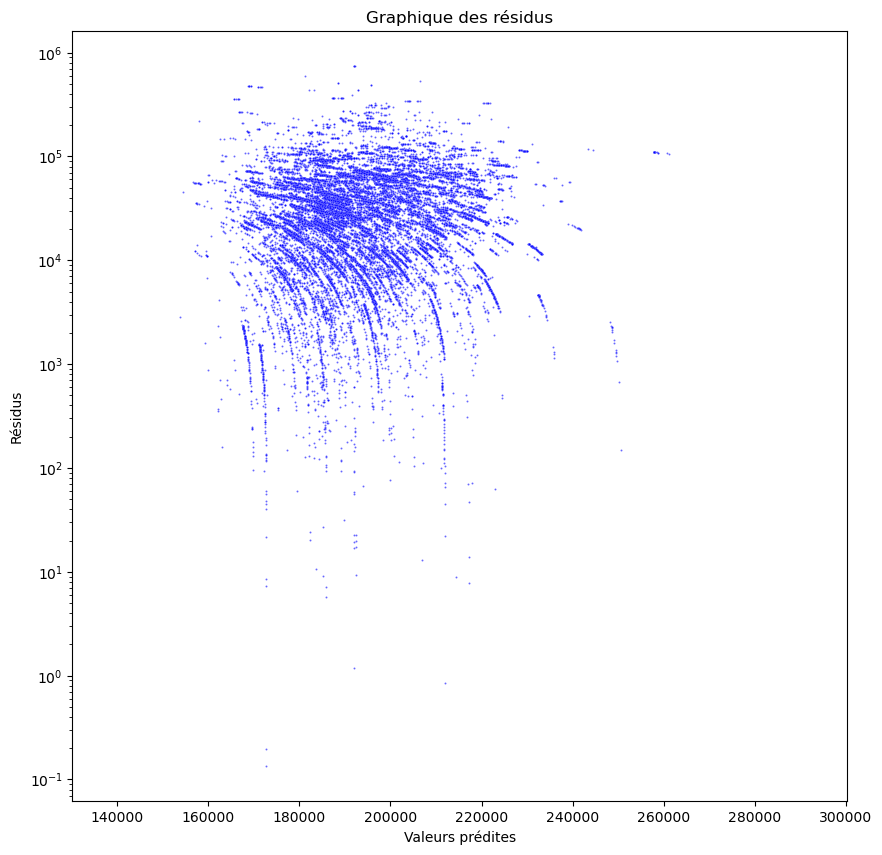

In [46]:
# Résidus du modèle
residuals = model.resid

# Graphique des résidus
plt.figure(figsize=(10, 10))
sns.scatterplot(x=model.fittedvalues, y=residuals, color='blue', alpha=0.6, s=2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Graphique des résidus')
plt.yscale('log')
plt.savefig('Graphique_residus.png', dpi=300)
plt.show()

Le nuage de points ressemble à une tâche compacte et aléatoire sans motif particulier centré autour de 0.

## Test de Ramsey
---
Considérons le modèle :

$$
\hat{Y} = E\{X \mid x\} = \beta X.
$$

Le test de Ramsey teste alors si les termes $(\beta X)^2, (\beta X)^3, \dots, (\beta X)^k$ ont un pouvoir explicatif sur $X$. Cela est réalisé en estimant la régression linéaire suivante :

$$
Y = \alpha X + \gamma_1 \hat{X}^2 + \cdots + \gamma_{k-1} \hat{X}^k + \varepsilon,
$$

### Hypothèses du test de Ramsey

- **Hypothèse nulle** :  
  $$ H_0 : \gamma_1 = \gamma_2 = \cdots = \gamma_{k-1} = 0 $$  
  (Les termes polynomiaux ne sont pas significatifs et le modèle est bien spécifié).

- **Hypothèse alternative** :  
  $$ H_1 : \text{Au moins un} \ \gamma_i \neq 0 \text{ pour } i \in \{1, 2, \dots, k-1\} $$  
  (Les termes polynomiaux sont significatifs, ce qui implique une mauvaise spécification du modèle).


In [49]:
# Test de Ramsey RESET
reset_test = linear_reset(model, power=2, use_f=True)  # Test avec Y^2

# Accéder aux résultats avec l'objet ContrastResults
print(f"Statistique F: {reset_test.fvalue:.4f}")
print(f"P-valeur: {reset_test.pvalue:.4f}")

# Interprétation des résultats
alpha = 0.05
if reset_test.pvalue < alpha:
    print("Le modèle est mal spécifié (il manque des variables ou des non-linéarités).")
else:
    print("On ne rejette pas l'hypothèse que le modèle est bien spécifié.")

Statistique F: 8.4971
P-valeur: 0.0036
Le modèle est mal spécifié (il manque des variables ou des non-linéarités).


## 4.3 - Analyse de la multicolinéarité

In [51]:
# Étape 3 : Vérifier la multicolinéarité (VIF)
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = range(X.shape[1])
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

vif_df = calculate_vif(X_e)
print("\nVariance Inflation Factors :\n", vif_df)


Variance Inflation Factors :
     Variable         VIF
0          0  299.066328
1          1    1.140917
2          2    1.166794
3          3    1.257727
4          4    1.159432
5          5    1.537265
6          6    2.628434
7          7    1.019768
8          8    2.340530
9          9    1.061001
10        10    1.124936
11        11    1.501896
12        12    1.200356
13        13    1.060742
14        14    1.425804
15        15    1.091234
16        16    1.067523
17        17    1.124014


Toutes les autres variables ont des VIF faibles (entre 1.02 et 2.53), ce qui indique qu'elles ne souffrent pas de multicolinéarité importante. En fait, elles sont assez indépendantes les unes des autres en termes de variabilité, ce qui est un bon signe pour la qualité du modèle.
Un VIF de 1 signifie qu'une variable n'est pas du tout corrélée avec les autres, et un VIF autour de 2 signifie qu'il y a une petite corrélation mais qui est acceptable.

Pas de problème de multicolinéarité majeur dans ton modèle, à l'exception de la constante (qui est normalement exclue de cette analyse).
Les variables 1 à 17 semblent bien séparées les unes des autres en termes de variabilité, ce qui signifie que les estimations des coefficients seront probablement fiables.

En résumé, il n'y a pas de soucis de multicolinéarité significative dans ce modèle, à part pour la constante qui est normale.

## 4.4 Homoscedasticité (Test de Breusch-Pagan)

In [54]:
# 1. Test de Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_stat, bp_pval = bp_test[0], bp_test[1]

# 2. Interprétation
if bp_pval < 0.05:
    print(f"Hétéroscédasticité détectée (rejette H0) avec une p_value de {bp_pval}")
else:
    print(f"Homocédasticité (on ne rejette pas H0) avec une p_value de{bp_pval}")

Hétéroscédasticité détectée (rejette H0) avec une p_value de 1.4750488639407897e-173


La variance des résidus n'est pas constante à travers les différentes valeurs des variables explicatives. Cela peut indiquer un problème avec ton modèle, car l'hypothèse de homoscédasticité est violée.

In [56]:
# Test de White pour détecter l'hétéroscédasticité
white_test = het_white(model.resid, model.model.exog)

# Afficher les résultats du test
print(f"Statistique de test : {white_test[0]:.4f}")
print(f"P-valeur : {white_test[1]:.4f}")
print(f"Statistique de test (critère de F) : {white_test[2]:.4f}")
print(f"Degrés de liberté : {white_test[3]}")
if white_test[1] < 0.05:
    print("Le modèle présente de l'hétéroscédacité")
else:
    print("Le modèle présente de l'homoscédacité")

Statistique de test : 4197.6817
P-valeur : 0.0000
Statistique de test (critère de F) : 27.0225
Degrés de liberté : 0.0
Le modèle présente de l'hétéroscédacité


# 4.5 Test de Normalité des résidus (Dessage du Q-Q plot & Test de Jarque-Bera)

À la différence du test de Shapiro-Wilk, qui est particulièrement puissant pour des échantillons de petite taille (généralement $n < 50$), le test de Jarque-Bera est mieux adapté aux grands échantillons comme le nôtre ($n_\text{obs} > 1\,000\,000$). Le test de Jarque-Bera examine spécifiquement ces deux aspects, ce qui le rend particulièrement pertinent pour détecter des déviations spécifiques de la normalité, telles que l'asymétrie des données ou un excès de kurtosis, qui peuvent être invisibles dans un simple test de normalité.

Le **test de Jarque-Bera** permet de tester la normalité d'une distribution en utilisant deux moments statistiques : l'asymétrie (skewness) et l'aplatissement (kurtosis) de la distribution.

### 1. Hypothèses du test de Jarque-Bera :

- **Hypothèse nulle (H₀)** : Les données suivent une distribution normale, ce qui implique une asymétrie (skewness) de 0 et une kurtosis de 3 (kurtosis excédentaire = 0).

$$ 
H_0 : \text{Skewness} = 0 \quad \text{et} \quad \text{Kurtosis} = 3
$$

- **Hypothèse alternative (H₁)** : Les données ne suivent pas une distribution normale, c'est-à-dire qu'elles présentent soit une asymétrie différente de 0, soit une kurtosis différente de 3 (ou les deux).

$$ 
H_1 : \text{Skewness} \neq 0 \quad \text{ou} \quad \text{Kurtosis} \neq 3
$$

### 2. Formule du test de Jarque-Bera :

La statistique du test de Jarque-Bera $JB$ est donnée par :

$$
JB = \frac{n - k}{6} \left( S^2 + \frac{(K - 3)^2}{4} \right)
$$

Où :
- $n$ : Le nombre d'observations.
- $k$ : Le nombre de variables explicatives si les données proviennent des **résidus d'une régression linéaire**. Sinon, $k = 0$.
- $S$ : L'asymétrie (skewness) de l'échantillon testé.
- $K$ : La kurtosis de l'échantillon testé.

### 3. Calcul de l'Asymétrie (Skewness) et de la Kurtosis :

L'asymétrie (skewness) et la kurtosis sont calculées avec les formules suivantes :

#### Asymétrie (Skewness) :

$$
S = \frac{\hat{\mu}_3}{\hat{\sigma}^3} = \frac{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^3}{\left( \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 \right)^{3/2}}
$$

Où :
- $\hat{\mu}_3$ est l'estimateur du troisième moment.
- $\bar{x}$ est la moyenne de l'échantillon.
- $\hat{\sigma}^2$ est la variance de l'échantillon.

#### Kurtosis :

$$
K = \frac{\hat{\mu}_4}{\hat{\sigma}^4} = \frac{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^4}{\left( \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 \right)^2}
$$

Où :
- $\hat{\mu}_4$ est l'estimateur du quatrième moment.
- $\bar{x}$ et $\hat{\sigma}^2$ sont respectivement la moyenne et la variance de l'échantillon.


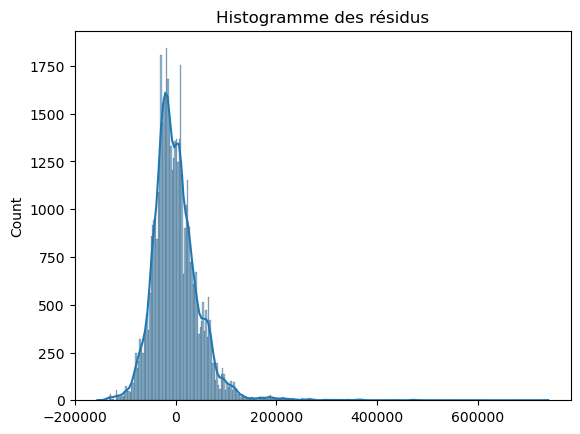

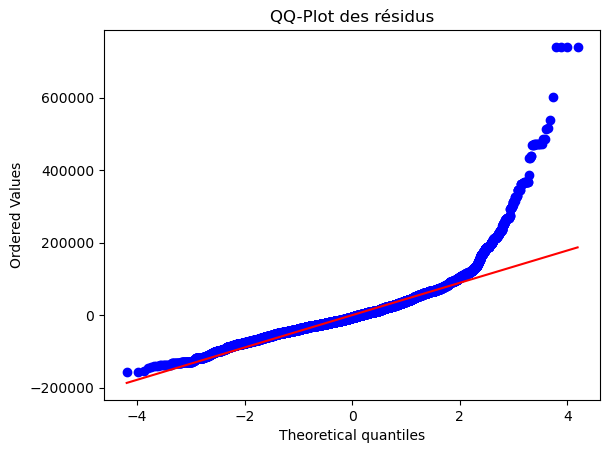

La p-value = 0.0 < 0,05, On rejette donc l'hypothèse de normalité des résidus. Donc Les résidus ne suivent pas une loi normale


In [58]:
# Histogramme des résidus
sns.histplot(model.resid, kde=True)
plt.title("Histogramme des résidus")
plt.show()

# QQ-plot
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title("QQ-Plot des résidus")
plt.show()


jb_test = jarque_bera(model.resid)
if jb_test[1] < 0.05:
    print(f"La p-value = {jb_test[1]} < 0,05, On rejette donc l'hypothèse de normalité des résidus. Donc Les résidus ne suivent pas une loi normale")
else:
    print(f"La p-value = {jb_test[1]} > 0,05. On accepte donc l'hypothèse de normalité des résidus. Donc Les résidus suivent une loi normale")

## 4.6 - Test d’indépendance des résidus (test d'autocorrélation) (Durbin-Watson)

Le test de Durbin-Watson mesure l'autocorrélation des résidus d'une régression. Il permet de vérifier s'il existe des relations temporelles ou des dépendances dans les erreurs, ce qui pourrait indiquer une structure de corrélation non capturée par le modèle.

In [60]:
# Calcul du test Durbin-Watson sur les résidus du modèle
dw_stat = durbin_watson(model.resid)

# Affichage de la valeur du test
print(f"Durbin-Watson: {dw_stat}")

# Interprétation en fonction de la valeur de Durbin-Watson
if dw_stat < 1.5:
    print("Autocorrélation positive détectée (possible problème d'indépendance des résidus).")
elif dw_stat > 2.5:
    print("Autocorrélation négative détectée (possible problème d'indépendance des résidus).")
else:
    print("Pas d'autocorrélation détectée (résidus indépendants).")

Durbin-Watson: 1.976929245535936
Pas d'autocorrélation détectée (résidus indépendants).


## 4.6 - Test du modèle à des transformation (Test de Box-Cox)
Vérifie si une transformation (log, sqrt, carré) améliore la régression

In [62]:
y_transformed, lambda_ = boxcox(Y_r)
print(f"Lambda optimal: {lambda_}")

Lambda optimal: -0.7363978779772863


## 4.7 - Test de robustesse aux valeurs extrêmes (Test de leverage (influence des points))
Identifie les points influents qui faussent la régression.

## 5 - Synthèse du diagnostique à postériori 
\begin{array}{|c|c|c|c|}
\hline
\textbf{Hypothèse} & \textbf{Test effectué} & \textbf{Résultat} & \textbf{Conclusion} \\
\hline
\text{1. Linéarité} & \text{Test de linéarité (Ramsay)} & \text{p-value = 0,000} & \text{Rejetée} \\
\hline
\text{2. Multicolinéarité} & \text{VIF (Variance Inflation Factor)} & \text{entre 1.02 et 2.53} & \text{Validée} \\
\hline
\text{3. Homoscedasticité} & \text{Test de Breusch-Pagan} & \text{p-value = 0.0000} & \text{Rejetée} \\
\hline
\text{4. Normalité des résidus} & \text{Test de normalité (Jaque-Bark, Q-Q plot)} & \text{p-value = 1.067170417299122e-247} & \text{Rejetée} \\
\hline
\text{5. Indépendance des résidus} & \text{Test de Durbin-Watson} & \text{2.001863590860673} & \text{Validée} \\
\hline
\end{array}
